In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:

from scipy.stats import rv_continuous
import numpy as np
from numpy import exp, sqrt
from scipy.integrate import quad
import matplotlib.pyplot as plt
import wkbl
from wkbl.particle import capture as ca
import fdulib as vdf
import sys
from scipy.misc import derivative as da
from matplotlib import rc
from StringIO import StringIO
import datetime
import scipy.ndimage as ndimage
import matplotlib.patches as mpatches
MetalFlag=0
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


### using   /home/arturo/Documents/git/notebooks-wkbl/Theory/input.dm  as inputs


Solar velocity arround GC     v_Sun =  220.0  km / s
Wimp density                    rho =  0.3  GeV / km^3 
Wimp-nucleon cross section    sigma =  5.62403697997e-06 km^2 SD Wimp-proton    
ffrom Ellis,Olive and Savage (2008) 
 proton mass                    m_p =  0.938272  GeV for SD is Hydorgen mass
Nuclear radius(depends on m_i)  r_i =  1.2e-13  ^km for hydrogen
Escape velocity               u_esc =  294.0 km / s
Dispertion velocity             v_0 =  27010000.0 km /s


<IPython.core.display.Javascript object>


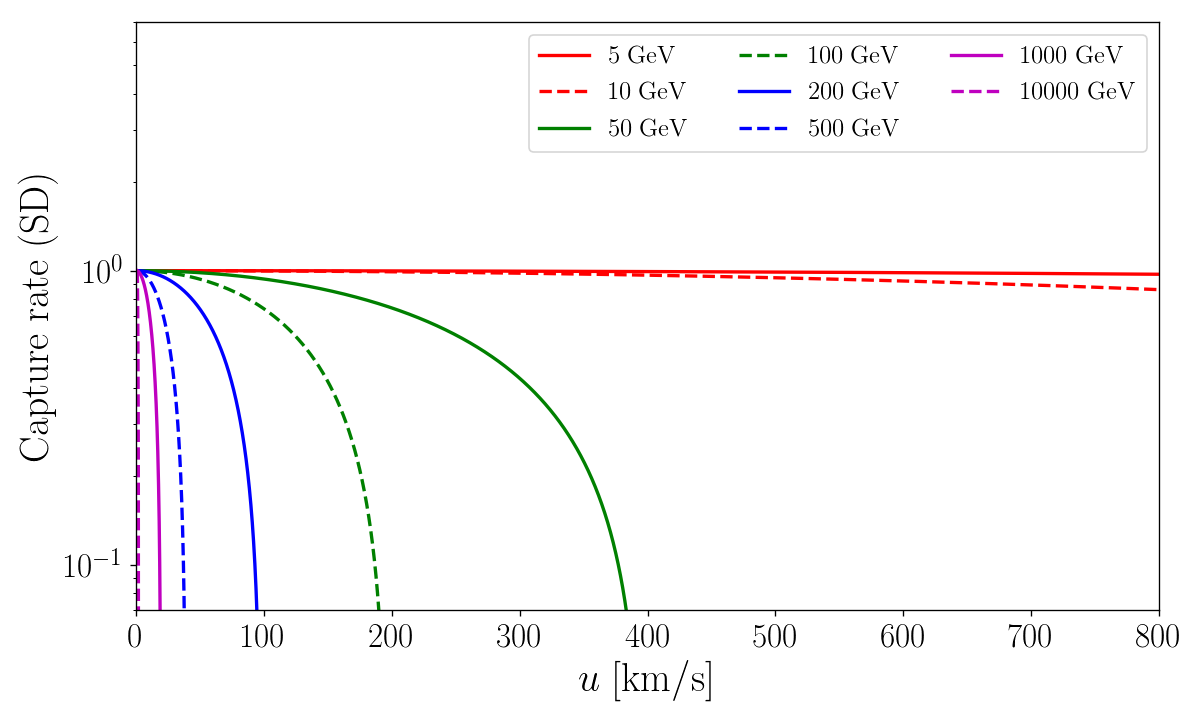

0 5
1 10
2 50
3 100
4 200
5 500
6 1000
7 10000


In [3]:
ca.get_variables() # prints variables in use (check captureLib)
### Plot parameters ###
fig ,ax = plt.subplots(figsize=[10,6])
ax.set_yscale('log')
ax.set_ylim([0.07,7])
ax.set_xlim([0,800])

ax.set_xlabel(r'$u \rm\; [km/s]$',fontsize=24)
ax.set_ylabel(r'$\rm Capture\; rate\; (SD)$',fontsize=24)
colors = ('r-','r--', 'g-','g--', 'b-','b--', 'm-','m--', )
########################
normal=ca.normalize_max
arrays=8 * [[]]
x_array = [i for i in np.arange(1,800.,0.1)]
particle_physics = np.vectorize(ca.caprate_GOU)
masses = (5, 10, 50, 100, 200, 500, 1000, 10000)
i=-1
for m,c in zip(masses,colors):
            i +=1
            print i, m
            arrays[i]=particle_physics(x_array,m)
            title = r'$ \rm '+ str(m)+' \;GeV$'
            ax.plot(x_array, normal(arrays[i]),c, label=title,linewidth=2.0)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
legend = ax.legend(loc='upper right', ncol=3, shadow=False, fontsize=15)
frame = legend.get_frame()

fig.tight_layout()
plt.savefig("/home/arturo/Documents/LAM/latex/Capture/Figures/PP_SD.pdf")

In [4]:
ca.caprate_GOUSI?

In [5]:
v_Sun = 220.#vdf.v_Sun
v_esc = vdf.v_esc
v_0 = vdf.v_shm
sun = ca.say_Sun()
n1 = vdf.get_n(vdf.shm_gal)
n2 = vdf.get_n(vdf.mao_gal)
n3 = vdf.get_n(vdf.lin_gal)

In [6]:
array = []
array2 = []
x_array = np.logspace(0.1, 4, num=100)
#x_array = np.append(x_array, 10000)
final = v_Sun+v_esc
print final
x = [i for i in np.arange(0.1,v_Sun+v_esc)]

def product(m,f):
    """
    the producto to be inside the integral
    """
    global x
    def inside_int(u):
        va = vdf.gal_to_sun(u,f)
        va2 = ca.caprate_GOU(u, m)# rms=str(f)[10])
        if va2 < 0:
                va2 = 1e-15
        return va * va2
    array = map(inside_int,x)
    final = np.trapz(array)
    return final



764.0


In [7]:
def get_simu(fun, particle_num):
    bins, prob, tmp = [] , [], []
    tmp = []
    final =v_Sun+v_esc
    starts, finish = 0, 760
    width = (finish - starts)/100
    for i in np.arange(starts,finish,1):
        
        if i % width == 0:
                bins.append(i)
                tmp.append(vdf.gal_to_sun(i, fun))
    a = sum(tmp)
    prob = [x / a  for x in tmp]
    data = np.random.choice(bins, particle_num, p=prob) # sample data
    line  = np.histogram(data, bins=bins, normed=1)
    bins = line[1][0:-1] 
    bin_size = int(float(bins[-1]) / len(bins) + 0.5)
    normalization = sum(line[0]) * bin_size
    hist = [x / normalization for x in line[0]]
    return bins, hist

bins, hist_shm = get_simu(vdf.shm_gal, 25000)

<IPython.core.display.Javascript object>


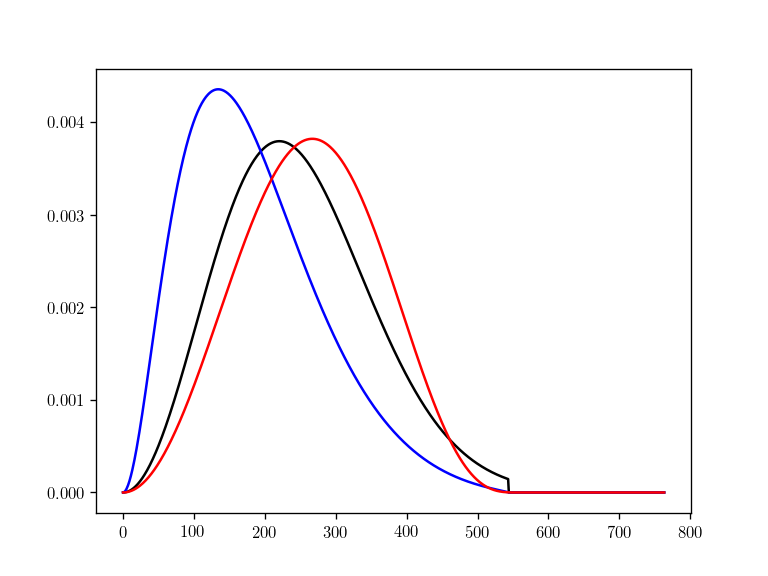

<IPython.core.display.Javascript object>


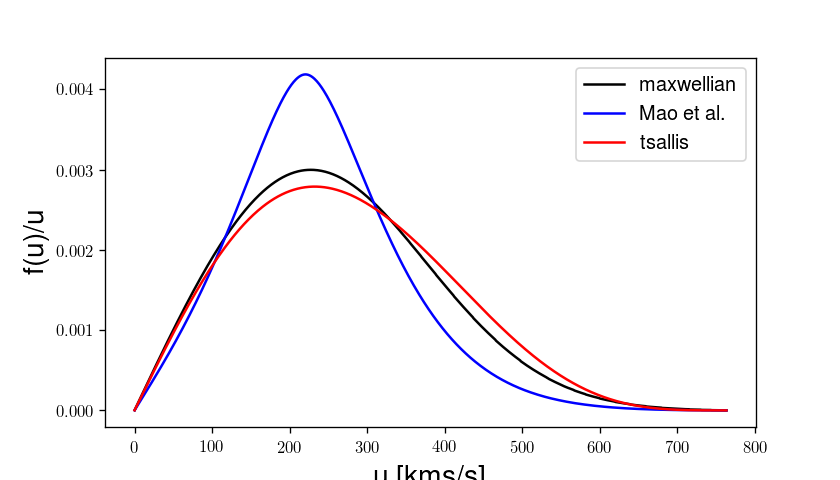

<IPython.core.display.Javascript object>


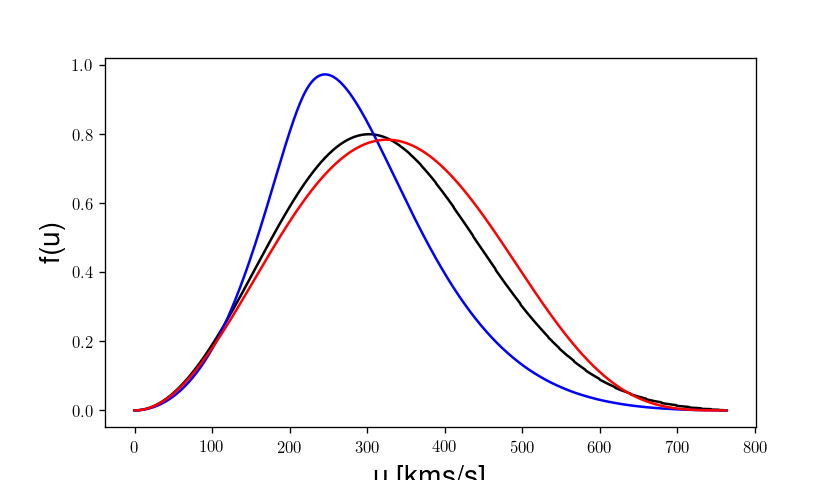

<IPython.core.display.Javascript object>


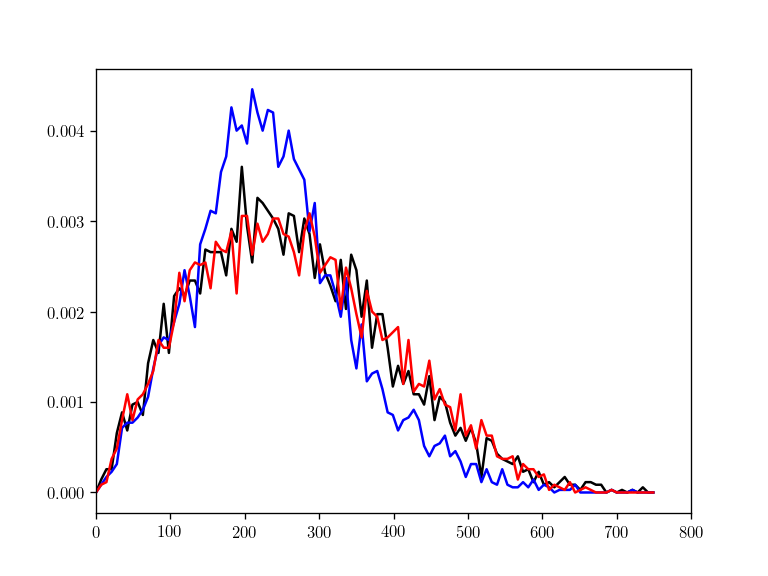

0.14285714285714288


In [8]:
sample_num = 5000
bins, hist_shm = get_simu(vdf.shm_gal, sample_num)
bin_mao, hist_mao = get_simu(vdf.mao_gal,sample_num)
bin_lin, hist_lin = get_simu(vdf.lin_gal,sample_num)

x = [i for i in np.arange(0.1,v_Sun+v_esc)]


SHM = map(vdf.shm_gal, x)
MAO = map(vdf.mao_gal,x)
LIN = map(vdf.lin_gal,x)


fig0 ,ax0 = plt.subplots()
ax0.plot(x, SHM,'k-')
ax0.plot(x, MAO,'b-')
ax0.plot(x, LIN,'r-')

sun=np.vectorize(vdf.gal_to_sun)

SHM_sun = sun(x,vdf.shm_gal)*n1
MAO_sun = sun(x,vdf.mao_gal)*n2
LIN_sun = sun(x,vdf.lin_gal)*n3
fig1 ,ax1 = plt.subplots(figsize=[7,4])
ax1.set_xlabel('u [kms/s]',fontsize=17 )
ax1.set_ylabel('f(u)/u',fontsize=17 )
ax1.plot(x, SHM_sun,'k-', label='maxwellian')
ax1.plot(x, MAO_sun, 'b-', label='Mao et al.')
ax1.plot(x, LIN_sun, 'r-', label='tsallis')
legend = ax1.legend(loc='upper right', ncol=1, shadow=False, fontsize=12)


fig1 ,ax11 = plt.subplots(figsize=[7,4])
ax11.set_xlabel('u [kms/s]',fontsize=17 )
ax11.set_ylabel('f(u)',fontsize=17 )
ax11.plot(x, SHM_sun*x,'k-', label='maxwellian')
ax11.plot(x, MAO_sun*x, 'b-', label='Mao et al.')
ax11.plot(x, LIN_sun*x, 'r-', label='tsallis')
legend = ax1.legend(loc='upper right', ncol=1, shadow=False, fontsize=12)


fig2 ,ax2 = plt.subplots()
ax2.set_xlim([0,800])
ax2.plot(bins,hist_shm, 'k-' )
ax2.plot(bin_mao, hist_mao,'b-')
ax2.plot(bin_lin, hist_lin,'r-')

print sum(hist_shm)

In [9]:
func = np.vectorize(product)
shm = func(x_array,vdf.shm_gal)
shm_full = shm
print "shm"
lin = func(x_array, vdf.lin_gal)
print "lin"
mao = func(x_array, vdf.mao_gal)
print "mao"
array = np.divide(lin,shm)
array2 = np.divide(mao,shm)


shm
lin
mao


<IPython.core.display.Javascript object>


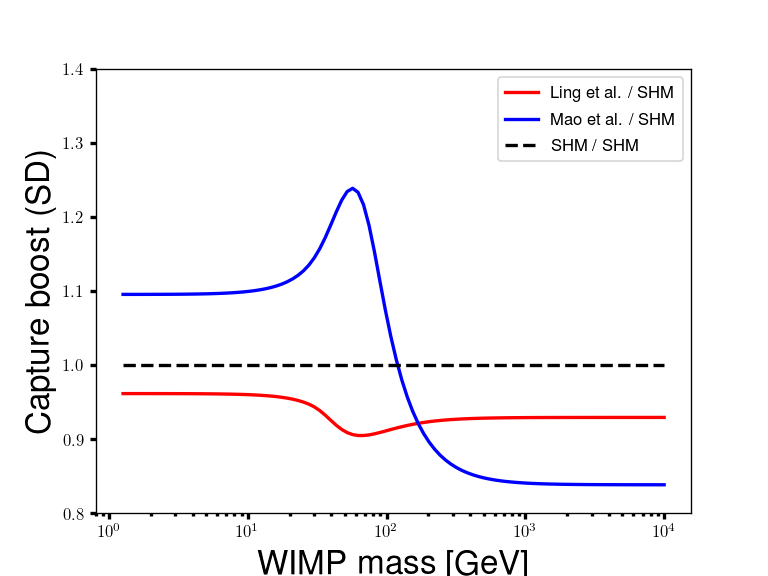

In [10]:

### Plotting section
fig ,ax = plt.subplots()
ax.set_xlabel('WIMP mass [GeV]',fontsize=20)
ax.set_ylabel('Capture boost (SD)',fontsize=20)
ax.set_xscale('log')
ax.set_ylim([0.8,1.4])
    #ax.set_xlim([1,20000])
line1 = ax.plot(x_array, array,'r-', linewidth=2.0,
                    label='Ling et al. / SHM')
line2 = ax.plot(x_array, array2,'b-', linewidth=2.0,
                    label="Mao et al. / SHM")
shm = [1 for i in x_array]
SHM = ax.plot(x_array, shm,'k--', linewidth=2.0,
                    label="SHM / SHM")
legend = ax.legend(loc='upper right', shadow=False)

Tsallis_MAXW = array
Mao_MAXW = array2

# The frame is matplotlib.patches.Rectangle instance surrounding the leg    end.
frame = legend.get_frame()
#fig.set_size_inches(10, 5)   
plt.tick_params(which='both', width=2)


plt.show()





In [11]:
print "v_0",v_0, "v_Sun",v_Sun,"v_esc", v_esc

v_0 270.0 v_Sun 220.0 v_esc 544.0


In [12]:
class SHM(rv_continuous):
    def _pdf(self, x):
        return vdf.shm_gal(x)

class MAO(rv_continuous):
    def _pdf(self, x):
        return vdf.mao_gal(x)
    
class LIN(rv_continuous):
    def _pdf(self, x):
        return vdf.lin_gal(x)

In [13]:

v_min, v_esc = 0., 544.
shm = SHM(name='shm', a=v_min, b=v_esc)
mao = MAO(name='mao', a=v_min, b=v_esc)
lin = LIN(name='lin', a=v_min, b=v_esc)



In [14]:

x = range(0,544)
y_shm = map(shm.pdf,x)
y_mao = map(mao.pdf,x)
y_lin = map(lin.pdf,x)


In [15]:
data_shm = shm.rvs(size=4000)
data_mao = mao.rvs(size=4000)
data_lin = lin.rvs(size=4000)
bins_samp = np.arange(0,v_esc,10)
line_shm  = np.histogram(data_shm, bins=bins_samp, normed=1)
line_mao  = np.histogram(data_mao, bins=bins_samp, normed=1)
line_lin  = np.histogram(data_lin, bins=bins_samp, normed=1)


<IPython.core.display.Javascript object>


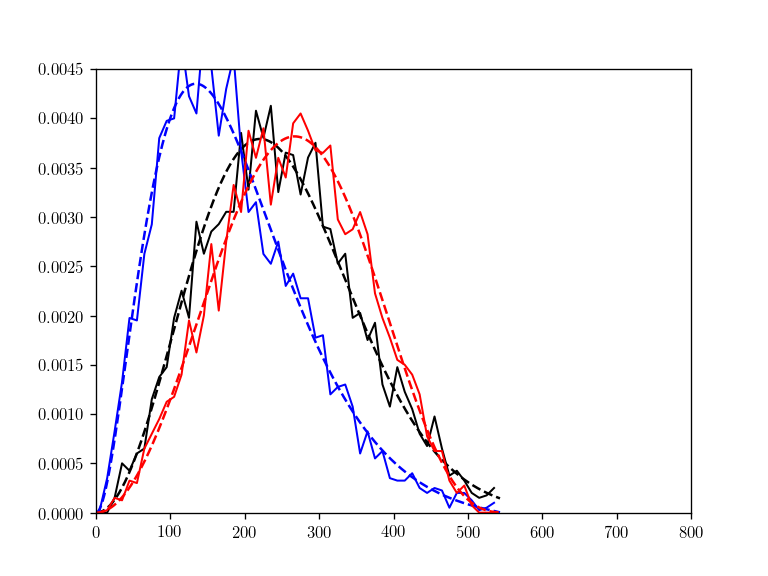

In [16]:
fig ,ax = plt.subplots()
ax.set_xlim([0,800])
ax.set_ylim([0,0.0045])
ax.plot(line_shm[1][0:-1]+5,line_shm[0], 'k-', linewidth=1.2)
ax.plot(x,y_shm, 'k--')
ax.plot(line_mao[1][0:-1]+5,line_mao[0], 'b-', linewidth=1.2)
ax.plot(x,y_mao,'b--')
ax.plot(line_lin[1][0:-1]+5,line_lin[0], 'r-', linewidth=1.2)
ax.plot(x,y_lin,'r--')

749
mao 0.14285714285714285 lin 0.14285714285714282 shm 0.14285714285714288
0.0010547311242876409


<IPython.core.display.Javascript object>


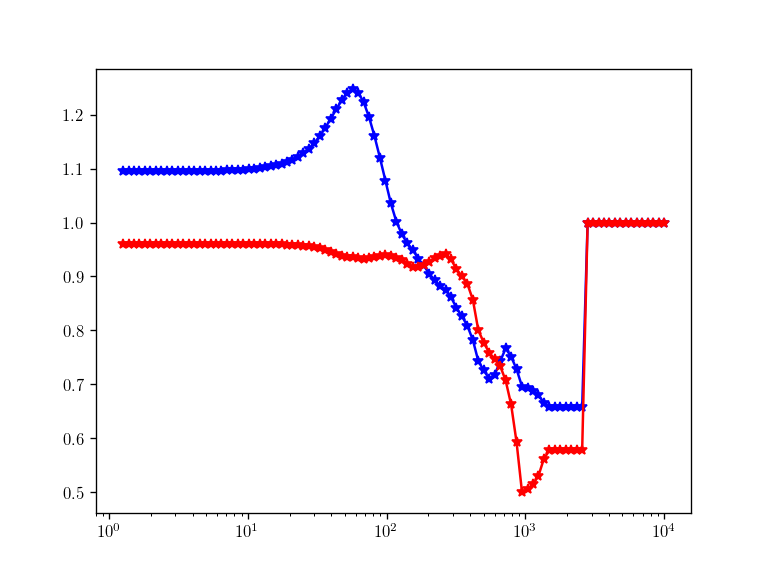

In [17]:
bin_aux = bins
x_array = np.logspace(0.1, 4, num=100)
min_bound = 0
print bins[-1]
hist_aux = hist_shm
def product_discrete(m):
    """
    the producto to be inside the integral
    """
    global x
    ancho = (bin_aux[-1]-bin_aux[0])/len(bin_aux)
    final = []
    
    for i in range(min_bound,len(bin_aux)):
        va = float(hist_aux[i])
        
        va2 = ca.caprate_GOU(bin_aux[i], m)#, rms=str(f)[10])
        if va2 < 0:
                final.append(1e-15)
        else:
                #print va, va2, float(va*va2)
                final.append(hist_aux[i]*va2)
    result = sum(final)*ancho
    return result


def product_SHM(m):
    """
    the producto to be inside the integral
    """
    global x
    ancho = (bin_aux[-1]-bin_aux[0])/len(bin_aux)
    final = []
    
    for i in range(min_bound,len(bin_aux)):
        va = float(SHM_sun[i])
        
        va2 = ca.caprate_GOU(bin_aux[i], m)#, rms=str(f)[10])
        if va2 < 0:
                final.append(1e-15)
        else:
                #print va, va2, float(va*va2)
                final.append(hist_aux[i]*va2)
    result = sum(final)*ancho
    return result



fun_dis = np.vectorize(product_discrete)
fun_SHM = np.vectorize(product_SHM)
## make SHM
hist_aux = np.array(hist_shm)/n1
shm_discrete = fun_SHM(x_array)
## make MAO
print 'mao',sum(hist_mao), 'lin', sum(hist_lin), 'shm', sum(hist_shm)
hist_aux = np.array(hist_mao)/n2
mao_discrete = fun_dis(x_array)
## make LIN
hist_aux = np.array(hist_lin)/n3
print sum(hist_aux)
lin_discrete = fun_dis(x_array)
## final arrays
mao_vs_shm=np.divide(mao_discrete, shm_discrete)
lin_vs_shm=np.divide(lin_discrete, shm_discrete)
fig ,ax = plt.subplots()



ax.set_xscale('log')
ax.plot(x_array, mao_vs_shm, 'b-*')
ax.plot(x_array, lin_vs_shm, 'r-*')




<IPython.core.display.Javascript object>


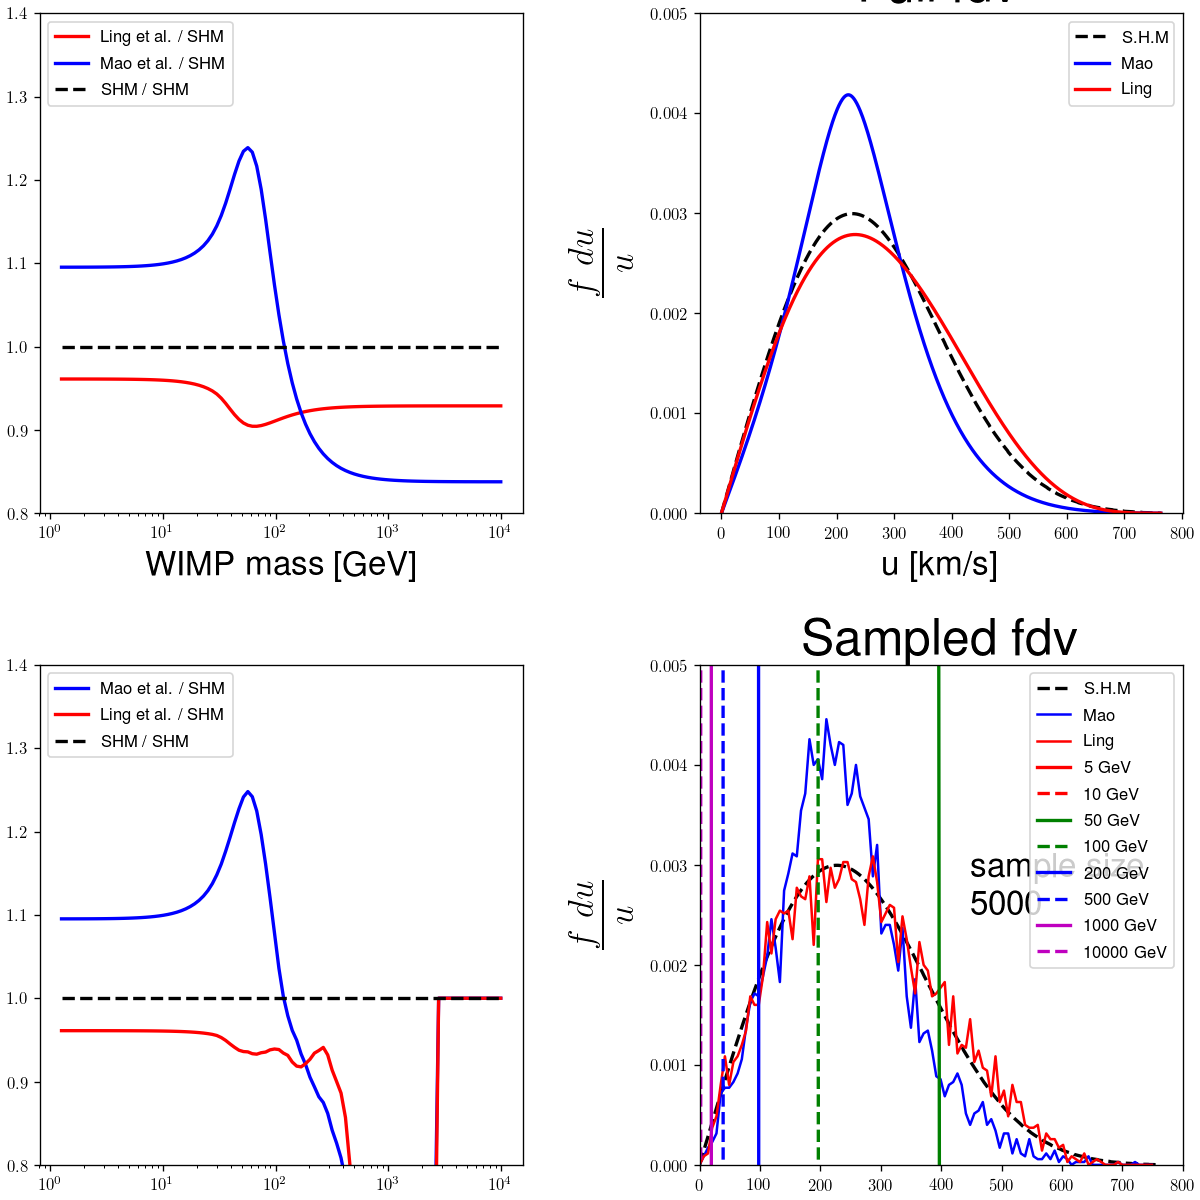

Text(450,0.0025,'sample size\n5000')

In [18]:
x = [i for i in np.arange(0.1,v_Sun+v_esc)]
### super plot
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(10,10))
plt.tight_layout(pad=0.4, w_pad=8, h_pad=7)
ax1.set_xlabel('WIMP mass [GeV]',fontsize=20)
ax1.set_ylabel('Capture boost (SD)',fontsize=20)
ax1.set_xscale('log')
ax1.set_ylim([0.8,1.4])
    #ax.set_xlim([1,20000])
line1 = ax1.plot(x_array, array,'r-', linewidth=2.0,
                    label='Ling et al. / SHM')
line2 = ax1.plot(x_array, array2,'b-', linewidth=2.0,
                    label="Mao et al. / SHM")
shm = [1 for i in x_array]
SHM = ax1.plot(x_array, shm,'k--', linewidth=2.0,
                    label="SHM / SHM")
legend = ax1.legend(loc='upper left', shadow=False)

# The frame is matplotlib.patches.Rectangle instance surrounding the leg    end.
frame = legend.get_frame()

##################################
ax2.set_title("Full fdv", fontsize=30)
ax2.set_ylim([0,0.005])
ax2.set_xlabel('u [km/s]',fontsize=20)
ax2.set_ylabel(r"$\frac{f\,\,du}{u}$",fontsize=30)
ax2.plot(x, SHM_sun,'k--', linewidth=2, label='S.H.M')
ax2.plot(x, MAO_sun, 'b-',linewidth=2, label='Mao')
ax2.plot(x, LIN_sun, 'r-',linewidth=2, label='Ling' )
legend = ax2.legend(loc='upper right', shadow=False)
# The frame is matplotlib.patches.Rectangle instance surrounding the leg    end.
frame = legend.get_frame()

#################################

ax3.set_xlabel('WIMP mass [GeV]',fontsize=20)
ax3.set_ylabel('Capture boost (SD)',fontsize=20)
ax3.set_xscale('log')
ax3.set_ylim([0.8,1.4])
ax3.plot(x_array, mao_vs_shm, 'b-', linewidth=2.0,
                    label="Mao et al. / SHM")
ax3.plot(x_array, lin_vs_shm, 'r-', linewidth=2.0,
                    label='Ling et al. / SHM')
shm = [1 for i in x_array]
SHM = ax3.plot(x_array, shm,'k--', linewidth=2.0,
                    label="SHM / SHM")

legend = ax3.legend(loc='upper left', shadow=False)
# The frame is matplotlib.patches.Rectangle instance surrounding the leg    end.
frame = legend.get_frame()

#########################################
ax4.set_title("Sampled fdv", fontsize=30)
ax4.set_ylim([0,0.005])
ax4.set_xlabel('u [km/s]',fontsize=20)
ax4.set_ylabel(r"$\frac{f\,\,du}{u}$",fontsize=30)
ax4.set_xlim([0,800])
#ax4.plot(bins,hist_shm, 'k--',linewidth=1.5, label='S.H.M')
ax4.plot(x, SHM_sun,'k--', linewidth=2, label='S.H.M')
ax4.plot(bin_mao, hist_mao,'b-',linewidth=1.5, label='Mao')
ax4.plot(bin_lin, hist_lin,'r-',linewidth=1.5, label='Ling')
i=-1
for m,c in zip(masses,colors):
            i +=1
            arrays[i]=particle_physics(x_array,m)
            title = str(m)+' GeV'
            ax4.plot(x_array, normal(arrays[i]),c, label=title,linewidth=2.0)


legend = ax4.legend(loc='upper right', shadow=False)
# The frame is matplotlib.patches.Rectangle instance surrounding the leg    end.
frame = legend.get_frame()

ax4.text(450,0.0025,'sample size\n'+str(sample_num), fontsize=20)

<IPython.core.display.Javascript object>


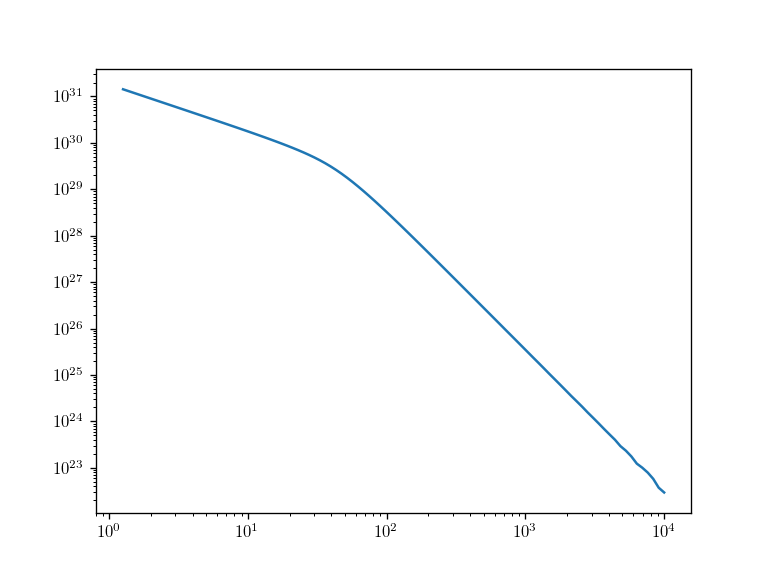

100 100


In [19]:
fig, ax = plt.subplots()
ax.plot(x_array,shm_full)
#ax.plot(x_array,lin)
#ax.plot(x_array,mao)
ax.set_xscale('log')
ax.set_yscale('log')
print len(shm_full), len(x_array)

$$\Large{Standar\,\,deviation\,\,\sigma}$$
the expectation value of a function $g(v)$ is defined as $$E[g(v)]=\langle g \rangle=\int _{-\infty} ^{\infty} g(v) \,f(v) \,dv$$
where $f(v)$ is the probability distribution, in our case the normalized velocity distribution function, and $$g(v)=\frac{PP(v)}{v}$$ here PP(v) is the particle physics section of the capture rate expresion as defined by A.Gould in 1987. Then the standard deviation $\sigma_g$ is given by

$$\sigma_g^{2}= E[g(v)^2] - \big[E[g(v)]\big]^2\,=\,\langle g(v)^2 \rangle - \langle g(v) \rangle^2$$ 

$$\sigma_g^{2} = \int _{-\infty} ^{\infty} g(v)^2 \,f(v) \,dv - \Bigg[\int _{-\infty} ^{\infty} g(v) \,f(v) \,dv\Bigg]^2 $$

finally:
$$\sigma_g^{2} = \int _{v_{min}} ^{v_{esc}} g(v)^2 \,f(v) \,dv - \Bigg[\int _{v_{min}} ^{v_{esc}} g(v) \,f(v) \,dv\Bigg]^2 $$


In [20]:
x = [i for i in np.arange(0.1,v_esc)]

def product(m,f):
    """
    the producto to be inside the integral
    """
    def inside_int(u):
        va = vdf.gal_to_sun(u,f)
        va2 = ca.caprate_GOU(u, m)# rms=str(f)[10])
        if va2 < 0:
                va2 = 1e-15
        return va * va2
    array = map(inside_int,x)
    final = np.trapz(array)
    return final

def product_square(m,f):
    """
    the producto to be inside the integral
    """
    def inside_int(u):
        va = vdf.gal_to_sun(u,f)
        va2 = ca.caprate_GOU(u, m)#, rms=str(f)[10])
        if va2 < 0:
                va2 = 1e-15
        return va * (va2)**2 / u
    array = map(inside_int,x)
    final = np.trapz(array)
    return final 

def cap(m,f):
    """
    the producto to be inside the integral
    """
    def inside_int(u):
        va = vdf.gal_to_sun(u,f)
        va2 = ca.caprate_GOU(u, m)#, rms=str(f)[10])
        if va2 < 0:
                va2 = 1e-15
        return va2
    #array = map(inside_int,x)
    #final = np.trapz(array)
    final = quad(inside_int, 0,1000)
    return final

## find this fuction above
E_g = np.vectorize(product)
E_g2 = np.vectorize(product_square)
check = np.vectorize(cap)
## fist test with maxwellian(shm) ##
fdu = vdf.shm_gal
mass_array = np.logspace(0.1, 4, num=100)
max1 = E_g(mass_array,fdu)
max2 =  E_g2(mass_array,fdu)
check_line= check(mass_array, fdu)
sigma_maxw = np.sqrt(max2 - (max1**2))

In [21]:
fdu = vdf.lin_gal
mass_array = np.logspace(0.1, 4, num=100)
ling1 = E_g(mass_array,fdu)
ling2 =  E_g2(mass_array,fdu)
check_line= check(mass_array, fdu)
sigma_ling = np.sqrt(ling2 - (ling1**2))

In [22]:
fdu = vdf.mao_gal
mass_array = np.logspace(0.1, 4, num=100)
mao1 = E_g(mass_array,fdu)
mao2 =  E_g2(mass_array,fdu)
sigma_mao = np.sqrt(mao2 - (mao1**2))

In [23]:
arr_maxw = max1 + sigma_maxw
arr_maxw2 = max1 - sigma_maxw
arr_ling = ling1 + sigma_ling
arr_ling2 = ling1 - sigma_ling
arr_mao = mao1 + sigma_mao
arr_mao2 = mao1 - sigma_mao

<IPython.core.display.Javascript object>


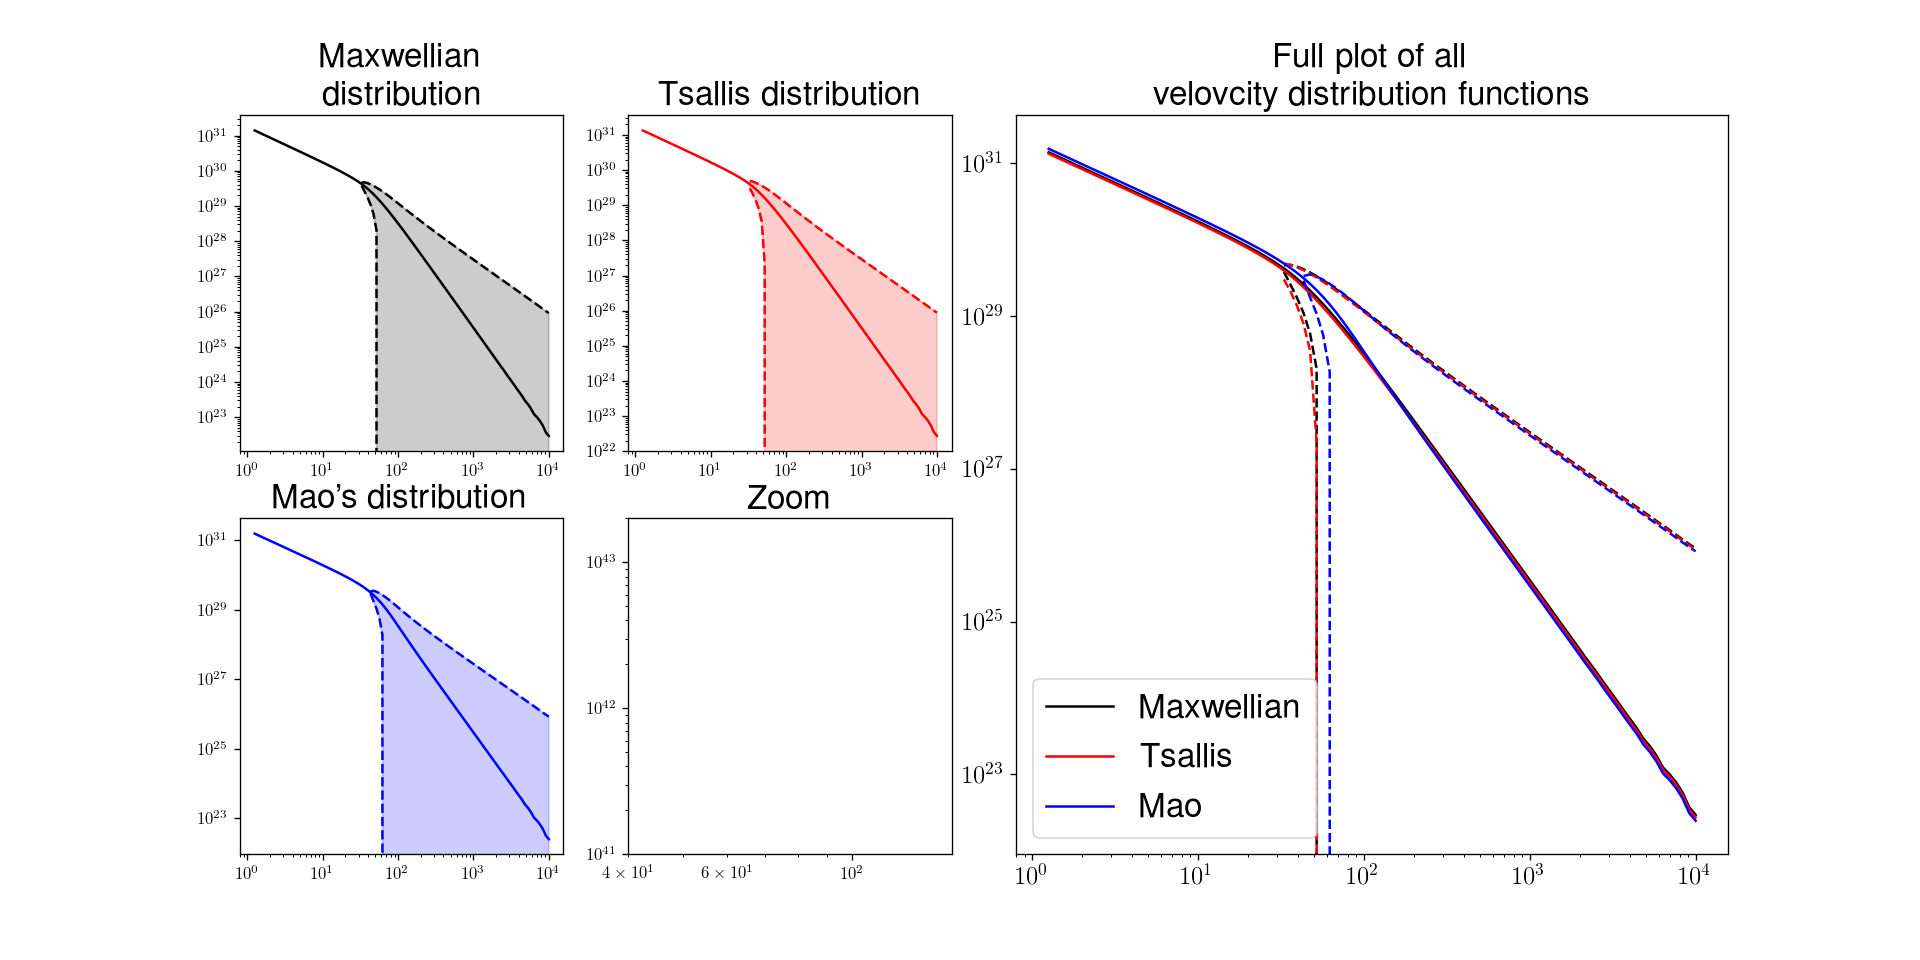

In [24]:
from matplotlib import gridspec

#fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(16,8))
fig = plt.figure(figsize=(16,8))
gs = gridspec.GridSpec(2, 4)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[0:,2:])


ax1.set_title('Maxwellian\ndistribution',fontsize=20)
ax1.plot(x_array,arr_maxw,'k--')
ax1.plot(x_array,arr_maxw2,'k--')
ax1.plot(x_array,max1,'k-')
ax1.fill_between(x_array,arr_maxw,arr_maxw2,color='k',alpha=0.2)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2.set_title('Tsallis distribution',fontsize=20)
ax2.plot(x_array,arr_ling,'r--')
ax2.plot(x_array,arr_ling2,'r--')
ax2.plot(x_array,ling1,'r-')
ax2.fill_between(x_array,arr_ling,arr_ling2,color='r',alpha=0.2)
ax2.set_xscale('log')
ax2.set_yscale('log')


ax3.set_title("Mao's distribution",fontsize=20)
ax3.plot(x_array,arr_mao,'b--')
ax3.plot(x_array,arr_mao2,'b--')
ax3.plot(x_array,mao1,'b-')
ax3.fill_between(x_array,arr_mao,arr_mao2,color='b',alpha=0.2)
ax3.set_xscale('log')
ax3.set_yscale('log')

ax4.set_title("Zoom",fontsize=20)
ax4.plot(x_array,arr_maxw,'k--')
ax4.plot(x_array,arr_maxw2,'k--')
ax4.plot(x_array,max1,'k-')
ax4.plot(x_array,arr_ling,'r--')
ax4.plot(x_array,arr_ling2,'r--')
ax4.plot(x_array,ling1,'r-')
ax4.plot(x_array,arr_mao,'b--')
ax4.plot(x_array,arr_mao2,'b--')
ax4.plot(x_array,mao1,'b-')
ax4.set_xlim([40,150])
ax4.set_ylim([1e41,2e43])
ax4.set_xscale('log')
ax4.set_yscale('log')

ax5.set_title("Full plot of all\nvelovcity distribution functions",fontsize=20)
ax5.plot(x_array,arr_maxw,'k--')
ax5.plot(x_array,arr_maxw2,'k--')
ax5.plot(x_array,max1,'k-',label='Maxwellian')
ax5.plot(x_array,arr_ling,'r--')
ax5.plot(x_array,arr_ling2,'r--')
ax5.plot(x_array,ling1,'r-',label='Tsallis')
ax5.plot(x_array,arr_mao,'b--')
ax5.plot(x_array,arr_mao2,'b--')
ax5.plot(x_array,mao1,'b-',label='Mao')
ax5.set_xscale('log')
ax5.set_yscale('log')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
legend = ax5.legend(loc='lower left', shadow=False,prop={'size':20})
frame = legend.get_frame()

so when doing the boost $B_i$ that gives the ratio between the function in question whith respect to the maxwellian velocity distribution function we consider the variance $\sigma_i$ prevously defined by doing error propagation in the following way $$B_i=\frac{C_i}{C_{maxwellian}}$$
so then:
$$\Delta B_i = \frac{\Delta C_i}{C_{maxwellian}}+\frac{C_i}{C_{maxwellian}^2}\Delta C_{maxwellian}$$

where $i = mao\,\, , \,\,Tsallis$

In [25]:
sigma_mao = np.nan_to_num(sigma_mao)
sigma_ling = np.nan_to_num(sigma_ling)
sigma_maxw = np.nan_to_num(sigma_maxw)
sigma_R_mao = (sigma_mao / max1)+(mao1 * sigma_maxw / (max1**2))
sigma_R_Ling = (sigma_ling / max1)+(ling1 * sigma_maxw / (max1**2))

<IPython.core.display.Javascript object>


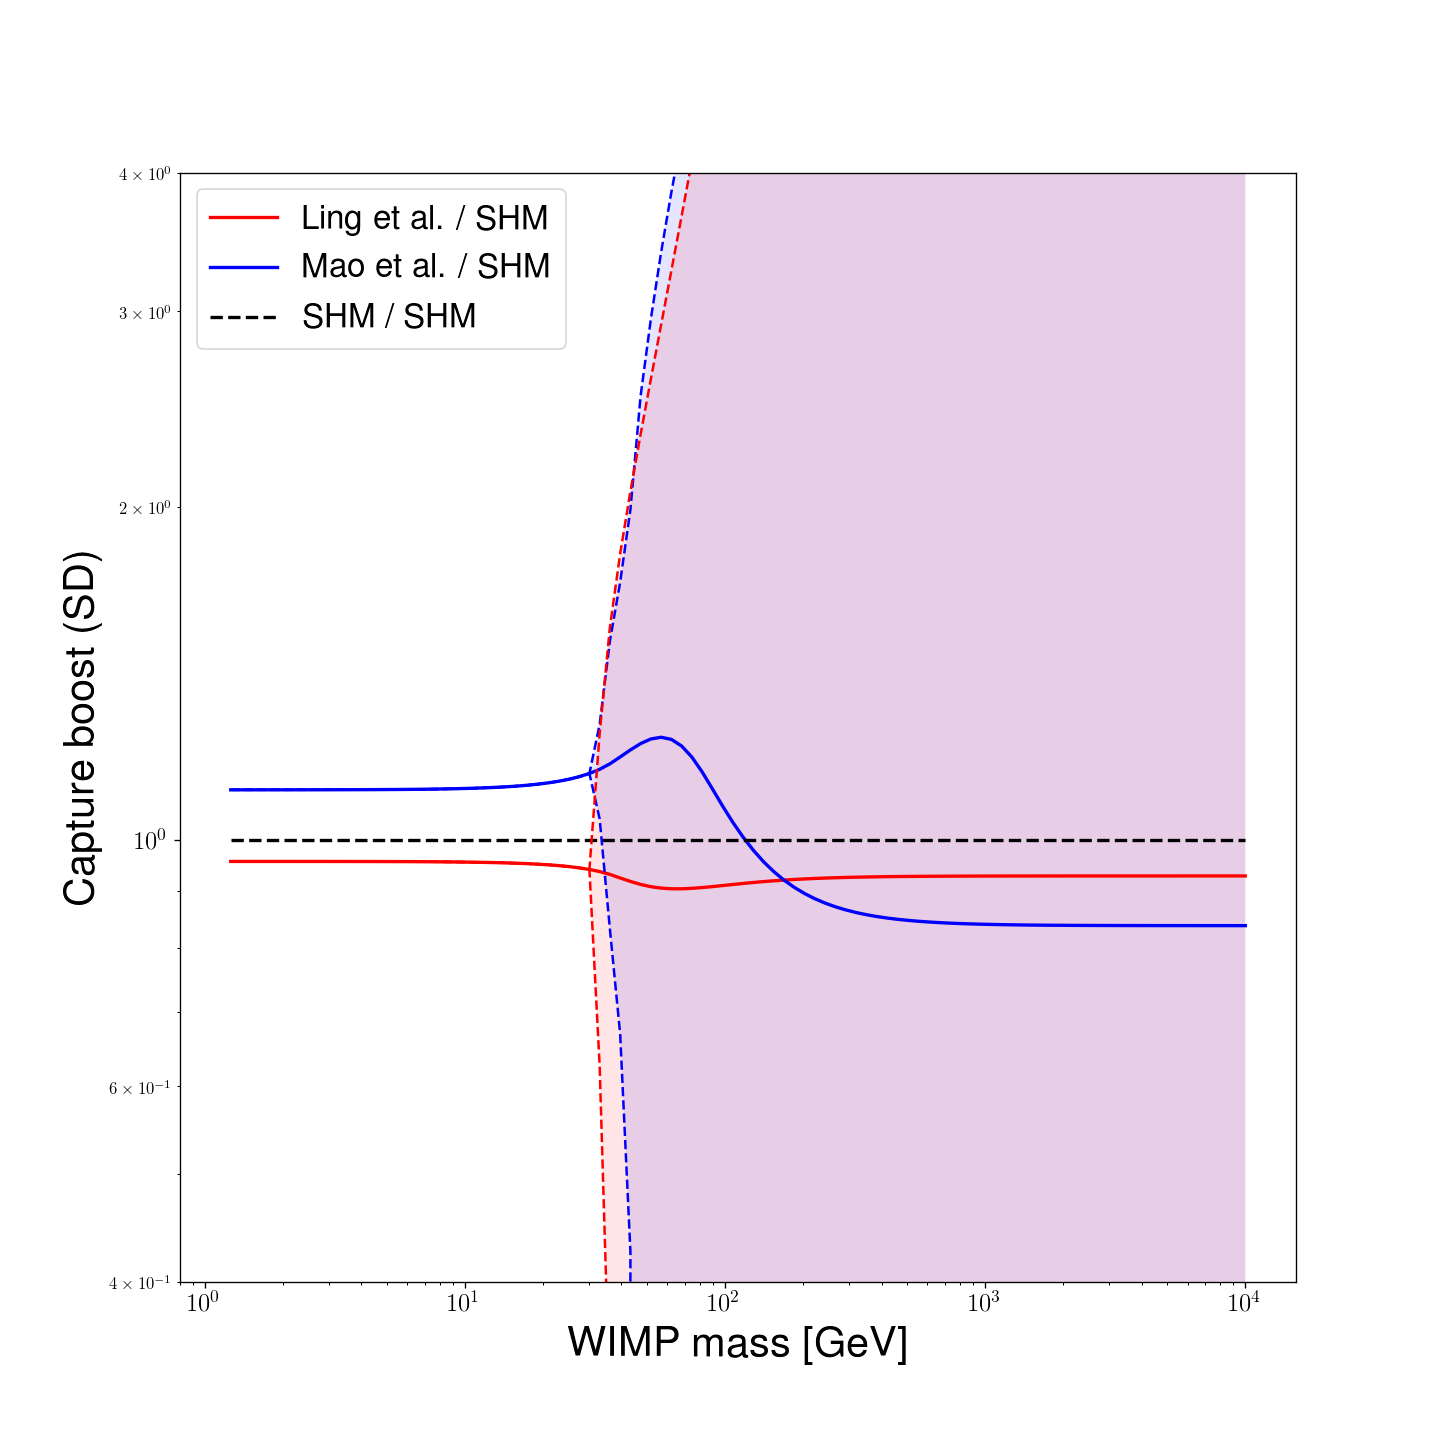

In [26]:
array = ling1/max1
array2 = mao1/max1


maoR_plus_sigma = array2 + sigma_R_mao
maoR_minus_sigma = array2 - sigma_R_mao
lingR_plus_sigma = array + sigma_R_Ling
lingR_minus_sigma = array - sigma_R_Ling
 

fig, ax1 = plt.subplots(figsize=(12,12))
ax1.set_xlabel('WIMP mass [GeV]',fontsize=25)
ax1.set_ylabel('Capture boost (SD)',fontsize=25)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_ylim([0.4,4])
    #ax.set_xlim([1,20000])
line1 = ax1.plot(x_array, array,'r-', linewidth=2.0,
                    label='Ling et al. / SHM')
line2 = ax1.plot(x_array, array2,'b-', linewidth=2.0,
                    label="Mao et al. / SHM")
shm = [1 for i in x_array]
SHM = ax1.plot(x_array, shm,'k--', linewidth=2.0,
                    label="SHM / SHM")

legend = ax1.legend(loc='upper left', shadow=False,prop={'size':20})
ax1.plot(x_array,maoR_plus_sigma,'b--')
ax1.plot(x_array,maoR_minus_sigma,'b--')
ax1.plot(x_array, lingR_plus_sigma, 'r--')
ax1.plot(x_array, lingR_minus_sigma, 'r--')
ax1.fill_between(x_array, array2,maoR_plus_sigma,facecolor='b',alpha=0.1)
ax1.fill_between(x_array, array2,maoR_minus_sigma,facecolor='b',alpha=0.1)
ax1.fill_between(x_array, array,lingR_plus_sigma,facecolor='r',alpha=0.1)
ax1.fill_between(x_array, array,lingR_minus_sigma,facecolor='r',alpha=0.1)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
# The frame is matplotlib.patches.Rectangle instance surrounding the leg    end.
frame = legend.get_frame()


<IPython.core.display.Javascript object>


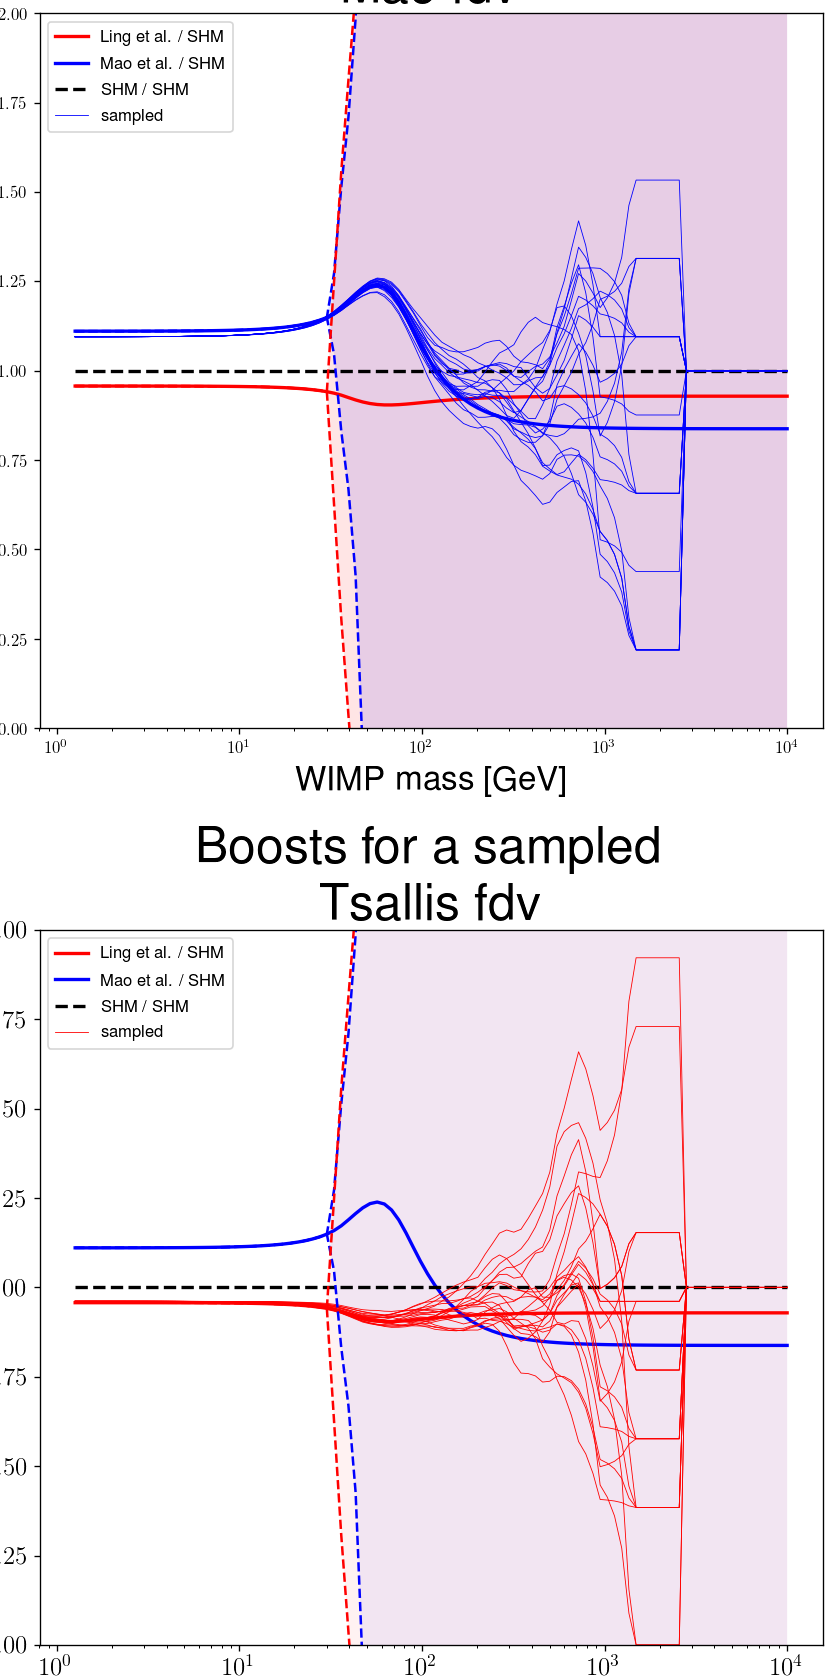

In [27]:
"""
maoR_plus_sigma = array2 + sigma_R_mao
maoR_minus_sigma = array2 - sigma_R_mao
lingR_plus_sigma = array + sigma_R_Ling
lingR_minus_sigma = array - sigma_R_Ling
"""

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(7,14))
plt.tight_layout(pad=0.4, w_pad=1, h_pad=10)
ax1.set_title('Boosts for a sampled\nMao fdv', fontsize=30)
ax1.set_xlabel('WIMP mass [GeV]',fontsize=20)
ax1.set_ylabel('Capture boost (SD)',fontsize=20)
ax1.set_xscale('log')
ax1.set_ylim([0,2])
    #ax.set_xlim([1,20000])
line1 = ax1.plot(x_array, array,'r-', linewidth=2.0,
                    label='Ling et al. / SHM')
line2 = ax1.plot(x_array, array2,'b-', linewidth=2.0,
                    label="Mao et al. / SHM")
shm = [1 for i in x_array]
SHM = ax1.plot(x_array, shm,'k--', linewidth=2.0,
                    label="SHM / SHM")

legend = ax1.legend(loc='upper left', shadow=False)
ax1.plot(x_array,maoR_plus_sigma,'b--')
ax1.plot(x_array,maoR_minus_sigma,'b--')
ax1.plot(x_array, lingR_plus_sigma, 'r--')
ax1.plot(x_array, lingR_minus_sigma, 'r--')
ax1.fill_between(x_array, array2,maoR_plus_sigma,facecolor='b',alpha=0.1)
ax1.fill_between(x_array, array2,maoR_minus_sigma,facecolor='b',alpha=0.1)
ax1.fill_between(x_array, array,lingR_plus_sigma,facecolor='r',alpha=0.1)
ax1.fill_between(x_array, array,lingR_minus_sigma,facecolor='r',alpha=0.1)

# The frame is matplotlib.patches.Rectangle instance surrounding the leg    end.
frame = legend.get_frame()
ax2.set_title('Boosts for a sampled\nTsallis fdv', fontsize=30)
ax2.set_xlabel('WIMP mass [GeV]',fontsize=20)
ax2.set_ylabel('Capture boost (SD)',fontsize=20)
ax2.set_xscale('log')
ax2.set_ylim([0,2])
    #ax.set_xlim([1,20000])
line1 = ax2.plot(x_array, array,'r-', linewidth=2.0,
                    label='Ling et al. / SHM')
line2 = ax2.plot(x_array, array2,'b-', linewidth=2.0,
                    label="Mao et al. / SHM")
shm = [1 for i in x_array]
SHM = ax2.plot(x_array, shm,'k--', linewidth=2.0,
                    label="SHM / SHM")

ax1.plot(x_array, mao_vs_shm, 'b-', linewidth=0.5,
                    label="sampled")
ax2.plot(x_array, lin_vs_shm, 'r-', linewidth=0.5,
                    label='sampled')


for i in range(0,20):
    bin_mao, hist_mao = get_simu(vdf.mao_gal,sample_num)
    bin_lin, hist_lin = get_simu(vdf.lin_gal,sample_num)
    ## make SHM
    hist_aux = np.array(hist_shm)/n1
    shm_discrete = fun_SHM(x_array)
    ## make MAO
    hist_aux = np.array(hist_mao)/n2
    mao_discrete = fun_dis(x_array)
    ## make LIN
    hist_aux = np.array(hist_lin)/n3
    lin_discrete = fun_dis(x_array)
    ## final arrays
    mao_vs_shm=np.divide(mao_discrete, shm_discrete)
    lin_vs_shm=np.divide(lin_discrete, shm_discrete)
    ax1.plot(x_array, mao_vs_shm, 'b-', linewidth=0.5)
    ax2.plot(x_array, lin_vs_shm, 'r-', linewidth=0.5)    



ax2.plot(x_array,maoR_plus_sigma,'b--')
ax2.plot(x_array,maoR_minus_sigma,'b--')
ax2.plot(x_array, lingR_plus_sigma, 'r--')
ax2.plot(x_array, lingR_minus_sigma, 'r--')
ax2.fill_between(x_array, array2,maoR_plus_sigma,facecolor='b',alpha=0.05)
ax2.fill_between(x_array, array2,maoR_minus_sigma,facecolor='b',alpha=0.05)
ax2.fill_between(x_array, array,lingR_plus_sigma,facecolor='r',alpha=0.05)
ax2.fill_between(x_array, array,lingR_minus_sigma,facecolor='r',alpha=0.05)


plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

legend1 = ax1.legend(loc='upper left', shadow=False)
legend2 = ax2.legend(loc='upper left', shadow=False)
# The frame is matplotlib.patches.Rectangle instance surrounding the leg    end.

frame1 = legend1.get_frame()
frame2 = legend2.get_frame()

# redifining the variance
## Taylor expanding around the full pdf distribution

In [28]:
x = [i for i in np.arange(0.1,v_Sun+v_esc)]

def capture_cut(m):
    uss = np.linspace(0,1000,100)
    nonorm=particle_physics(uss,m)
    yesnor=np.array(ca.normalize_max(nonorm))
    return uss[np.abs(yesnor-0.09)==(np.abs(yesnor-0.09)).min()]


def norm(f,cut):
    def inside_int(u):
        va = f(u)#vdf.gal_to_sun(u,f)
        return va
    step=1.
    x_loc = [i for i in np.arange(0.1,cut,step)]
    array = map(inside_int,x_loc)
    norm = np.trapz(array)*step
    return norm

def norms(f,cut):
    def inside_int(u):
        va = vdf.gal_to_sun(u,f)*u
        return va
    step=1.
    x_loc = [i for i in np.arange(0.1,cut,step)]
    array = map(inside_int,x_loc)
    norm = np.trapz(array)*step
    return norm

def mu(f,cut):
    """
    the producto to be inside the integral
    """
    step=0.2
    x_loc = [i for i in np.arange(0.1,cut,step)]
    def inte(u):
        va = vdf.gal_to_sun(u,f)
        return va *u**2
    array = map(inte,x_loc)
    final = np.trapz(array)
    return final*step/norms(f,cut)

def var(f,cut):
    """
    the producto to be inside the integral
    """
    def meanofsquare(u):
        va = vdf.gal_to_sun(u,f) *u
        return va * (u**2) 
    step=0.2
    x_loc = [i for i in np.arange(0.1,cut,step)]
    mx = mu(f,cut)
    mx2 = map(meanofsquare,x_loc)
    Emx2 = np.trapz(mx2)*step/norms(f,cut)
    final = Emx2 - mx**2
    return final

cut= 900.

print "shm", mu(vdf.shm_gal,cut),np.sqrt(var(vdf.shm_gal,cut))
print "lin", mu(vdf.lin_gal,cut),np.sqrt(var(vdf.lin_gal,cut))
print "mao",mu(vdf.mao_gal,cut),np.sqrt(var(vdf.mao_gal,cut))




shm 322.1515322218489 125.08637947202078
lin 334.5978768266109 126.28496659776033
mao 283.52751017473526 106.2901767255741


In [29]:
def thismu(m,f,n):
    step=0.2
    x_loc = [i for i in np.arange(0.1,1000,step)]
    def inte(u):
        va = vdf.gal_to_sun(u,f)
        va2 = particle_physics(u,m)
        return va * va2
    array = map(inte,x_loc)
    final = np.trapz(array)
    return final*step/n
"""
def thismu(m,f):
    def inside_int(u):
        va = vdf.gal_to_sun(u,f)
        va2 = ca.caprate_GOU(u, m)#, rms=str(f)[10])
        if va2 < 0:
                va2 = 0.0
        return va * va2
    step=0.2
    x_loc = [i for i in np.arange(0.1,1000,step)]
    array = map(inside_int,x_loc)
    final = np.trapz(array)
    return final
"""


def variance_OG(m,f,cut,mymu,n):
    step=0.2
    x_loc = [i for i in np.arange(0.1,cut,step)]
    def inte(u):
        va = vdf.gal_to_sun(u,f)
        va2 = particle_physics(u,m)
        return va * u * ( (va2/u) - mymu )**2
    array = map(inte,x_loc)
    final = np.trapz(array)
    return final*step/n

In [30]:


mass_array = np.logspace(0.1, 4, num=50)
#mu_mao,var_mao =  mu(vdf.mao_gal,1000),var(vdf.mao_gal,1000)
mao_sigma = mao_sigma2 = np.array([])
#mu_lin,var_lin =  mu(vdf.lin_gal,1000),var(vdf.lin_gal,1000)
lin_sigma =lin_sigma2 = np.array([])
#mu_shm,var_shm =  mu(vdf.shm_gal,1000),var(vdf.shm_gal,1000)
shm_sigma = np.array([])
cut = 1000.#capture_cut(i)
mu_mao , mu_lin, mu_shm = mu(vdf.mao_gal,cut), mu(vdf.lin_gal,cut),mu(vdf.shm_gal,cut)
var_mao , var_lin, var_shm = var(vdf.mao_gal,cut),var(vdf.lin_gal,cut),var(vdf.shm_gal,cut)
axu = 0
n_mao, n_lin, n_shm =  norms(vdf.mao_gal,1000),norms(vdf.lin_gal,1000),norms(vdf.shm_gal,1000)
for i in mass_array:    
    axu+=1
    print axu
    local_mu = thismu(i,vdf.mao_gal,n_mao)
    mao_sigma = np.append(mao_sigma, np.sqrt(variance_OG(i,vdf.mao_gal,cut,local_mu,n_mao)))
    local_mu = thismu(i,vdf.lin_gal,n_lin)
    lin_sigma = np.append(lin_sigma, np.sqrt(variance_OG(i,vdf.lin_gal,cut,local_mu,n_lin)))
    local_mu = thismu(i,vdf.shm_gal,n_shm)
    shm_sigma = np.append(shm_sigma, np.sqrt(variance_OG(i,vdf.shm_gal,cut,local_mu,n_shm)))
    #mao_sigma2 = np.append(mao_sigma2, (variance(i,vdf.mao_gal,mu_mao,var_mao)[1]))
    #lin_sigma2 = np.append(lin_sigma2, (variance(i,vdf.lin_gal,mu_lin,var_lin)[1]))
    #shm_sigma2 = np.append(shm_sigma2, (variance(i,vdf.shm_gal,mu_shm,var_shm)[1]))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


<IPython.core.display.Javascript object>


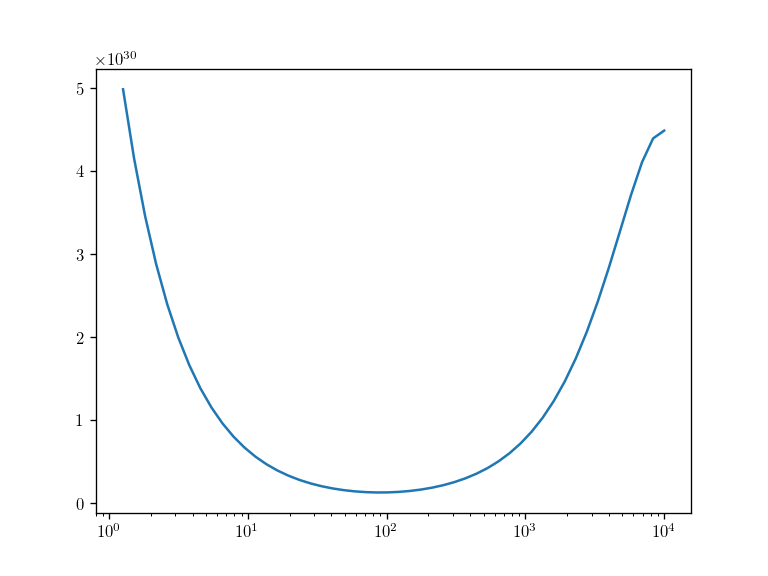

In [31]:
fig, ax = plt.subplots()
ax.set_xscale('log')
#ax.plot(x,y)
ax.plot(mass_array,lin_sigma)
#ax.plot(mass_array,lin_sigma2,'r-o')

#ax.plot(x[x<500],y[x<500]/np.abs(y[x<500]).max())

In [32]:
def product(m,f):
    """
    the producto to be inside the integral
    """
    def inside_int(u):
        va = vdf.gal_to_sun(u,f)
        va2 = ca.caprate_GOU(u, m)#, rms=str(f)[10])
        if va2 < 0:
                va2 = 0.0
        return va * va2
    array = map(inside_int,x)
    final = np.trapz(array)
    return final/norms(f,1000)


## find this fuction above
E_g = np.vectorize(product)
E_g2 = np.vectorize(product_square)
#check = np.vectorize(cap)
## fist test with maxwellian(shm) ##
fdu = vdf.shm_gal
#mass_array = np.logspace(0.1, 4, num=100)
max1 = E_g(mass_array,fdu)#/norms(fdu,800)
fdu = vdf.lin_gal
ling1 = E_g(mass_array,fdu)#/norms(fdu,800)
fdu = vdf.mao_gal
mao1 = E_g(mass_array,fdu)#/norms(fdu,800)

In [33]:
arr_maxw = max1 + shm_sigma
arr_maxw2 = max1 - shm_sigma
arr_ling = ling1 + lin_sigma
arr_ling2 = ling1 - lin_sigma
arr_mao = mao1 + mao_sigma
arr_mao2 = mao1 - mao_sigma

In [34]:
def equilibrium(m):
    return (1./(330.*np.sqrt(3e-26)*(m/10.)**(3./4.)))**2

eq = np.vectorize(equilibrium)

<IPython.core.display.Javascript object>


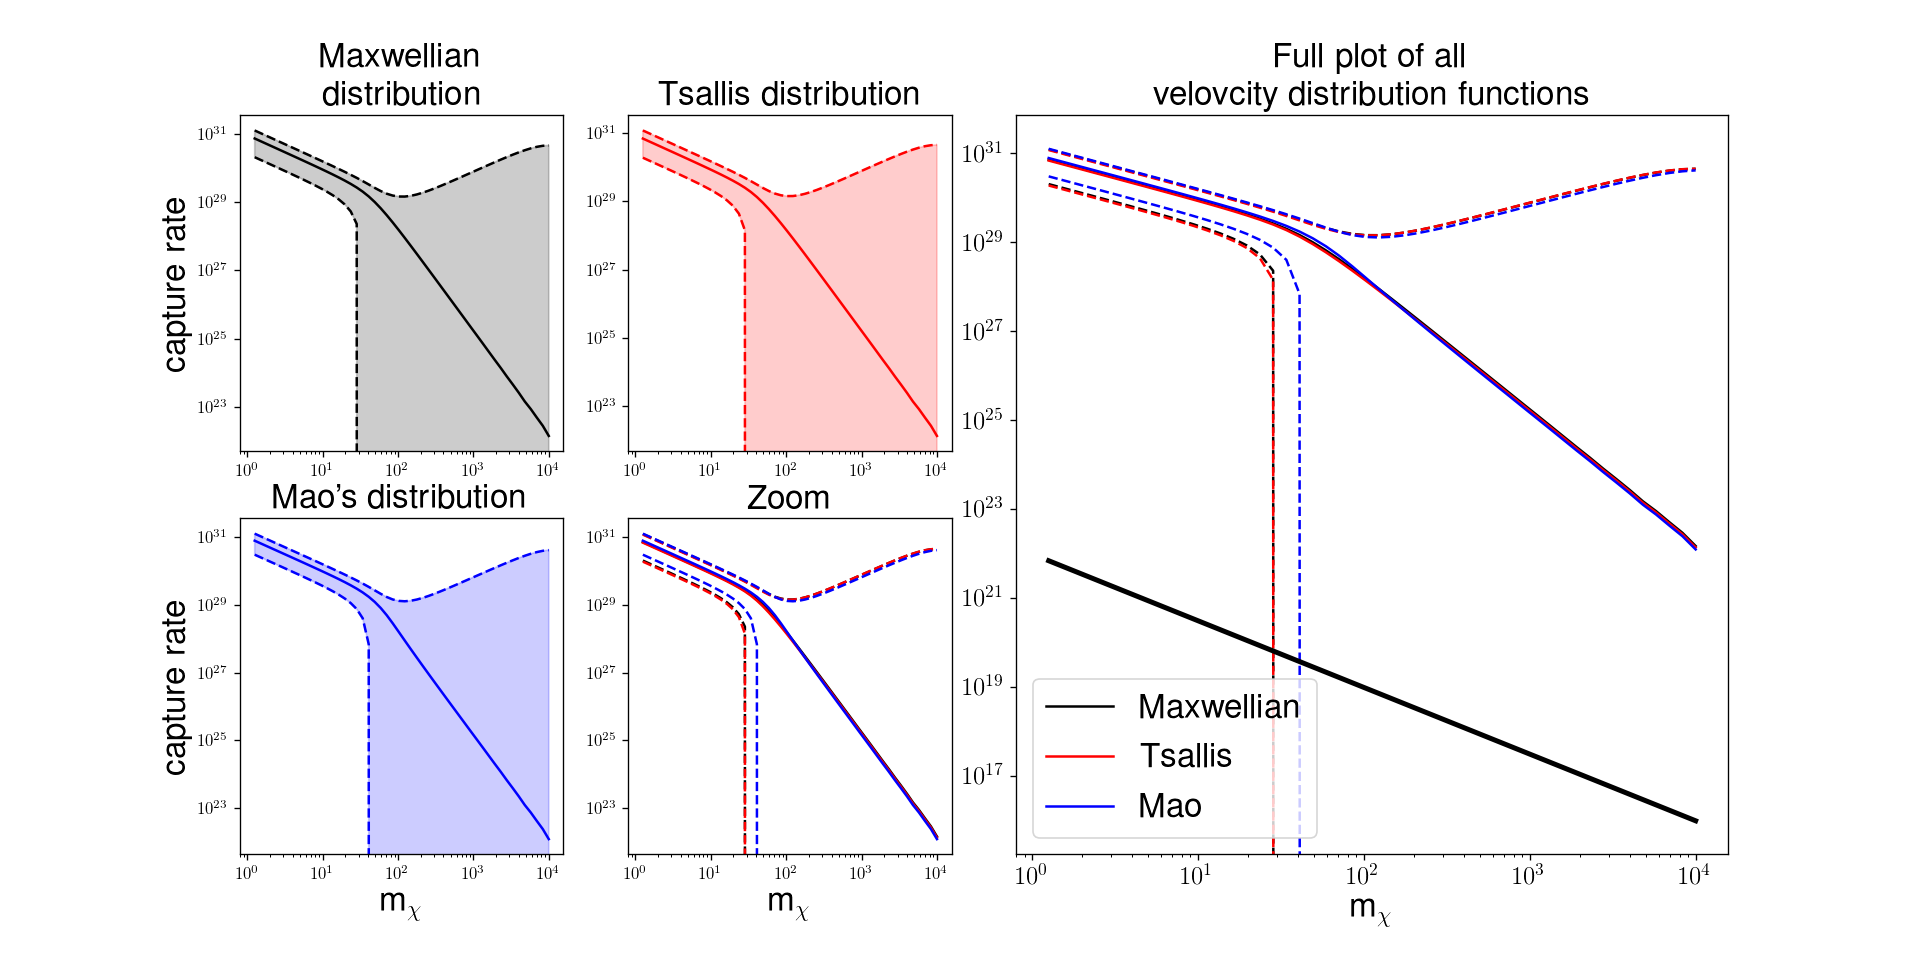

In [35]:
from matplotlib import gridspec
x_array = mass_array
#fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(16,8))
fig = plt.figure(figsize=(16,8))
gs = gridspec.GridSpec(2, 4)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[0:,2:])


ax1.set_title('Maxwellian\ndistribution',fontsize=20)
ax1.set_ylabel("capture rate",fontsize=20)
ax1.plot(x_array,arr_maxw,'k--')
ax1.plot(x_array,arr_maxw2,'k--')
ax1.plot(x_array,max1,'k-')
ax1.fill_between(x_array,arr_maxw,arr_maxw2,color='k',alpha=0.2)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2.set_title('Tsallis distribution',fontsize=20)
ax2.plot(x_array,arr_ling,'r--')
ax2.plot(x_array,arr_ling2,'r--')
ax2.plot(x_array,ling1,'r-')
ax2.fill_between(x_array,arr_ling,arr_ling2,color='r',alpha=0.2)
ax2.set_xscale('log')
ax2.set_yscale('log')


ax3.set_title("Mao's distribution",fontsize=20)
ax3.set_ylabel("capture rate",fontsize=20)
ax3.set_xlabel(r"m$_{\chi}$",fontsize=20)

ax3.plot(x_array,arr_mao,'b--')
ax3.plot(x_array,arr_mao2,'b--')
ax3.plot(x_array,mao1,'b-')
ax3.fill_between(x_array,arr_mao,arr_mao2,color='b',alpha=0.2)
ax3.set_xscale('log')
ax3.set_yscale('log')

ax4.set_title("Zoom",fontsize=20)
ax4.set_xlabel(r"m$_{\chi}$",fontsize=20)
ax4.plot(x_array,arr_maxw,'k--')
ax4.plot(x_array,arr_maxw2,'k--')
ax4.plot(x_array,max1,'k-')
ax4.plot(x_array,arr_ling,'r--')
ax4.plot(x_array,arr_ling2,'r--')
ax4.plot(x_array,ling1,'r-')
ax4.plot(x_array,arr_mao,'b--')
ax4.plot(x_array,arr_mao2,'b--')
ax4.plot(x_array,mao1,'b-')
#ax4.set_xlim([0,100])
#ax4.set_ylim([1e28,2e32])
ax4.set_xscale('log')
ax4.set_yscale('log')

ax5.set_title("Full plot of all\nvelovcity distribution functions",fontsize=20)
#ax5.set_ylabel("capture rate",fontsize=20)
ax5.set_xlabel(r"m$_{\chi}$",fontsize=20)
ax5.plot(x_array,arr_maxw,'k--')
ax5.plot(x_array,arr_maxw2,'k--')
ax5.plot(x_array,max1,'k-',label='Maxwellian')
ax5.plot(x_array,arr_ling,'r--')
ax5.plot(x_array,arr_ling2,'r--')
ax5.plot(x_array,ling1,'r-',label='Tsallis')
ax5.plot(x_array,arr_mao,'b--')
ax5.plot(x_array,arr_mao2,'b--')
ax5.plot(x_array,mao1,'b-',label='Mao')
ax5.set_xscale('log')
ax5.set_yscale('log')
ax5.plot(x_array,eq(x_array),"k-",lw=3)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
legend = ax5.legend(loc='lower left', shadow=False,prop={'size':20})
frame = legend.get_frame()

In [38]:
## constans ##
G = 6.708e-39
T = 1e7 #freeze out temperature
m_relic = 1.  # relic mass
r_sun =  1e6
e_0 = 1.
sigma = 3.e-26



def phi(r,rho):
    """
    gravitational potential of a self gravitatinf sphere
    """
    return  -16 * (np.pi**2) * G * (r**5) * (rho**2) / 15

def V_1(m,rho):
    def integrand(r):
        return (r**2) * np.exp(-m * phi(r,rho) / T)
    
    result = quad(integrand,0,r_sun)[0]
    return result

def V_2(m,rho):
    def integrand(r):
        return (r**2) * np.exp(-2 * m * phi(r,rho) / T)
    
    result = quad(integrand,0,r_sun)[0] 
    return result / e_0

def thermal_averge(sigma,m):
    def integrand_1(v):
        return sigma * (v**3) * np.exp(-m * (v**2) / T)
    
    def integrand_2(v):
        return (v**2) * np.exp(-m * (v**2) / T)
    
    result = quad(integrand_1,0,544.)[0] / quad(integrand_2, 0, 544.)[0]
    return result

def C_a(rho, m, sigma):
    return thermal_averge(sigma, m) * V_2(m,rho) / (V_1(m,rho)**2)
ca = np.vectorize(C_a)

In [39]:
10./ca(0.4,x_array,sigma)*(4.5e9)

array([1.22854886e+51, 1.22916767e+51, 1.22991253e+51, 1.23080950e+51,
       1.23189022e+51, 1.23319311e+51, 1.23476499e+51, 1.23666306e+51,
       1.23895738e+51, 1.24173410e+51, 1.24509959e+51, 1.24918579e+51,
       1.25415719e+51, 1.26022016e+51, 1.26763516e+51, 1.27673329e+51,
       1.28793842e+51, 1.30179697e+51, 1.31901791e+51, 1.34052562e+51,
       1.36752800e+51, 1.40159952e+51, 1.44477212e+51, 1.49961126e+51,
       1.56922664e+51, 1.65713063e+51, 1.76684039e+51, 1.90119798e+51,
       2.06163246e+51, 2.24789620e+51, 2.45872155e+51, 2.69309109e+51,
       2.95116090e+51, 3.23430522e+51, 3.54467325e+51, 3.88483063e+51,
       4.25763087e+51, 4.66620618e+51, 5.11398963e+51, 5.60474375e+51,
       6.14259214e+51, 6.73205418e+51, 7.37808266e+51, 8.08610502e+51,
       8.86207361e+51, 9.71250536e+51, 1.06445471e+52, 1.16660305e+52,
       1.27855386e+52, 1.40124783e+52])

In [40]:
sigma_mao = (mao_sigma)
sigma_ling = (lin_sigma)
sigma_maxw = (shm_sigma)
sigma_R_mao = (sigma_mao / max1)**2+(mao1 * sigma_maxw / (max1**2))**2
sigma_R_Ling = (sigma_ling / max1)**2+(ling1 * sigma_maxw / (max1**2))**2

<IPython.core.display.Javascript object>


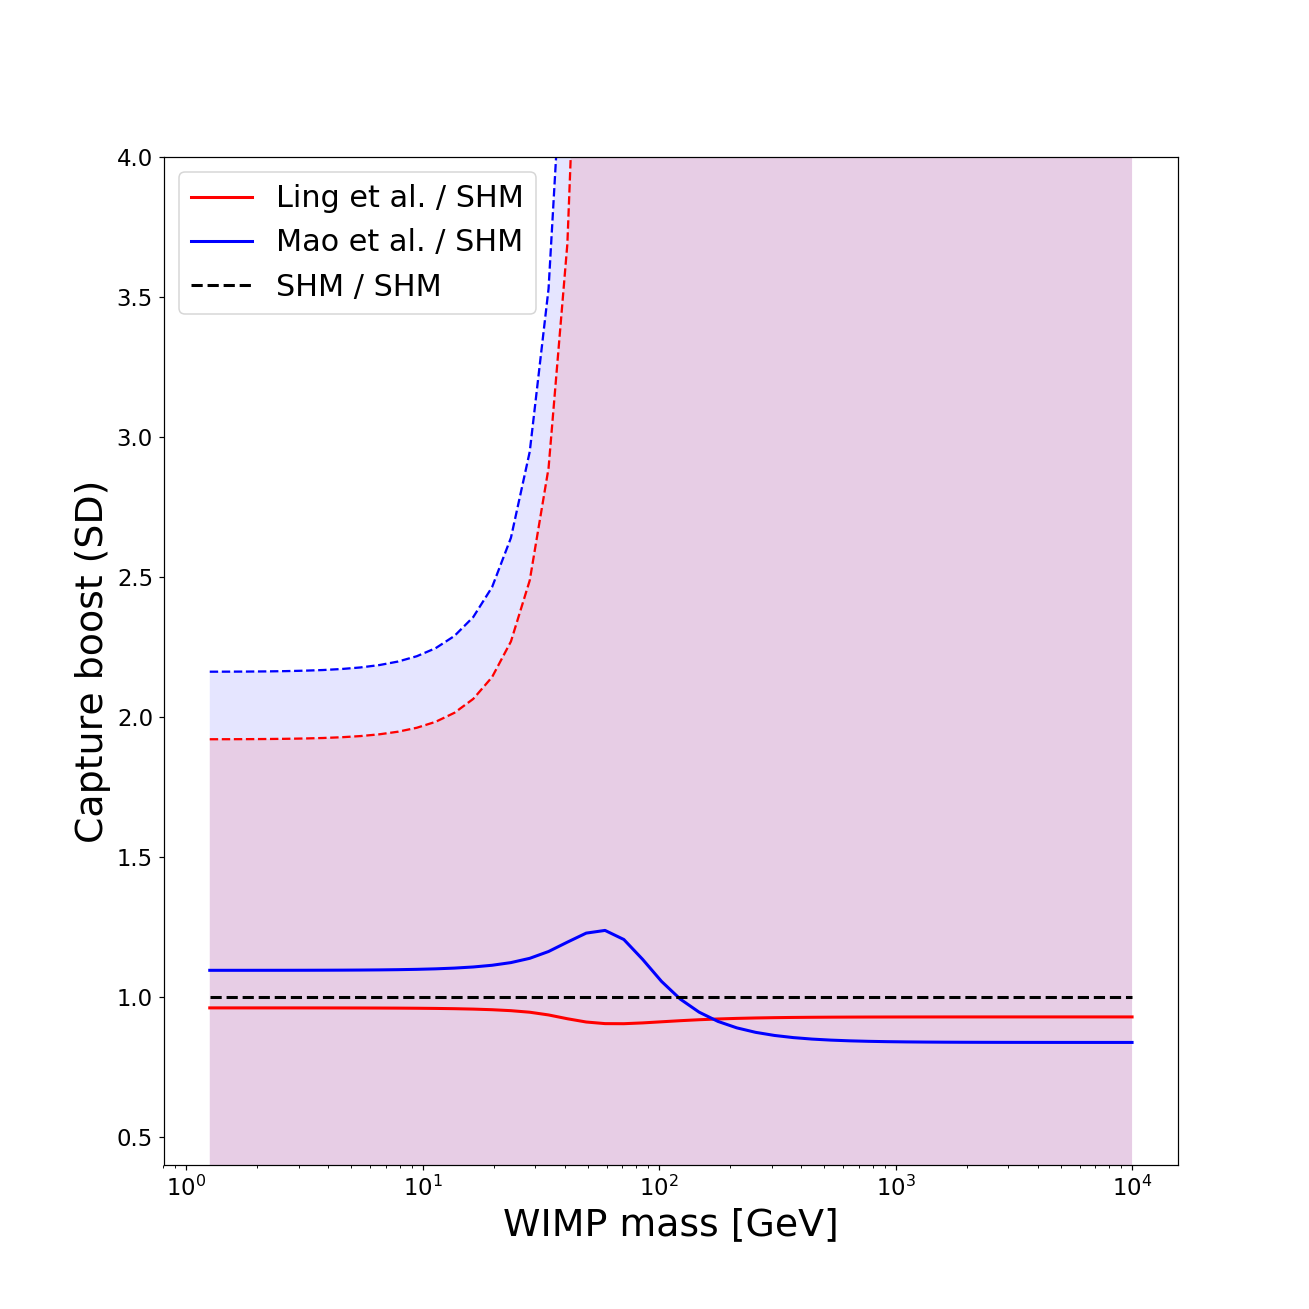

In [41]:
array = ling1/max1
array2 = mao1/max1

maoR_plus_sigma = array2 + sigma_R_mao
maoR_minus_sigma = array2 - sigma_R_mao
lingR_plus_sigma = array + sigma_R_Ling
lingR_minus_sigma = array - sigma_R_Ling
 

fig, ax1 = plt.subplots(figsize=(12,12))
ax1.set_xlabel('WIMP mass [GeV]',fontsize=25)
ax1.set_ylabel('Capture boost (SD)',fontsize=25)
ax1.set_xscale('log')
#ax1.set_yscale('log')

ax1.set_ylim([0.4,4])
#ax.set_xlim([1,20000])
line1 = ax1.plot(x_array, array,'r-', linewidth=2.0,
                    label='Ling et al. / SHM')
line2 = ax1.plot(x_array, array2,'b-', linewidth=2.0,
                    label="Mao et al. / SHM")
shm = [1 for i in x_array]
SHM = ax1.plot(x_array, shm,'k--', linewidth=2.0,
                    label="SHM / SHM")

legend = ax1.legend(loc='upper left', shadow=False,prop={'size':20})
ax1.plot(x_array,maoR_plus_sigma,'b--')

ax1.plot(x_array,maoR_minus_sigma,'b--')
ax1.plot(x_array, lingR_plus_sigma, 'r--')
ax1.plot(x_array, lingR_minus_sigma, 'r--')
ax1.fill_between(x_array, array2,maoR_plus_sigma,facecolor='b',alpha=0.1)
ax1.fill_between(x_array, array2,maoR_minus_sigma,facecolor='b',alpha=0.1)
ax1.fill_between(x_array, array,lingR_plus_sigma,facecolor='r',alpha=0.1)
ax1.fill_between(x_array, array,lingR_minus_sigma,facecolor='r',alpha=0.1)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
# The frame is matplotlib.patches.Rectangle instance surrounding the leg    end.
frame = legend.get_frame()


In [47]:
## u = np.linspace(0., 700., 100.)
def variance(m,f,mu,var):
    minimum = np.where((np.abs(u-mu))==(np.abs(u-mu)).min())
    capture = np.vectorize(ca.caprate_GOU)
    y = capture(u,m)
    dy = np.zeros(y.shape,np.float)
    dy[0:-1] = np.diff(y)/np.diff(u)
    dy[-1] = (y[-1] - y[-2])/(u[-1] - u[-2])
    ddy = np.zeros(dy.shape,np.float)
    ddy[0:-1] = np.diff(dy)/np.diff(u)
    ddy[-1] = (dy[-1] - dy[-2])/(u[-1] - u[-2])
    return (((dy[minimum]**2)*var)), (((ddy[minimum]**2)*(var**2)/4.))

#mass_array = np.logspace(0.1, 4, num=100)
#mu_mao,var_mao =  mu(vdf.mao_gal,1000),var(vdf.mao_gal,1000)
mao_sigma = mao_sigma2 = np.array([])
#mu_lin,var_lin =  mu(vdf.lin_gal,1000),var(vdf.lin_gal,1000)
lin_sigma =lin_sigma2 = np.array([])
#mu_shm,var_shm =  mu(vdf.shm_gal,1000),var(vdf.shm_gal,1000)
shm_sigma = np.array([])
cut = 1000.#capture_cut(i)
mu_mao , mu_lin, mu_shm = mu(vdf.mao_gal,cut), mu(vdf.lin_gal,cut),mu(vdf.shm_gal,cut)
var_mao , var_lin, var_shm = var(vdf.mao_gal,cut),var(vdf.lin_gal,cut),var(vdf.shm_gal,cut)
for i in mass_array:    
    mao_sigma = np.append(mao_sigma, (variance(i,vdf.mao_gal,mu_mao,var_mao))[0])
    lin_sigma = np.append(lin_sigma, (variance(i,vdf.lin_gal,mu_lin,var_lin))[0])
    shm_sigma = np.append(shm_sigma, (variance(i,vdf.shm_gal,mu_shm,var_shm))[0])
    mao_sigma2 = np.append(mao_sigma2, (variance(i,vdf.mao_gal,mu_mao,var_mao)[1]))
    lin_sigma2 = np.append(lin_sigma2, (variance(i,vdf.lin_gal,mu_lin,var_lin)[1]))
    shm_sigma2 = np.append(shm_sigma2, (variance(i,vdf.shm_gal,mu_shm,var_shm)[1]))


<IPython.core.display.Javascript object>


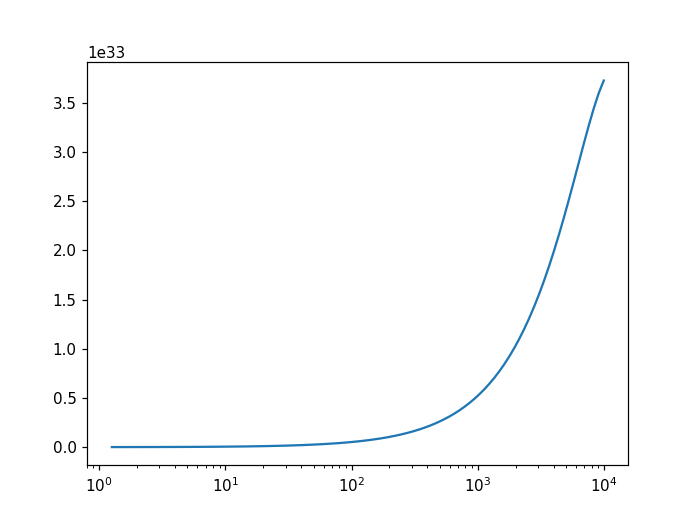

In [48]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(mass_array,np.sqrt(lin_sigma))
#ax.plot(mass_array,lin_sigma2,'r-o')

#ax.plot(x[x<500],y[x<500]/np.abs(y[x<500]).max())

In [50]:

x = [i for i in np.arange(0.1,v_esc)]
def product(m,f):
    """
    the producto to be inside the integral
    """
    def inside_int(u):
        va = vdf.gal_to_sun(u,f)
        va2 = ca.caprate_GOU(u, m)#, rms=str(f)[10])
        if va2 < 0:
                va2 = 0.0
        return va * va2
    array = map(inside_int,x)
    final = np.trapz(array)
    return final

def product_square(m,f):
    """
    the producto to be inside the integral
    """
    def inside_int(u):
        va = vdf.gal_to_sun(u,f)
        va2 = ca.caprate_GOU(u, m)#, rms=str(f)[10])
        if va2 < 0:
                va2 = 0.0
        return  va *((va2)**2)/ u
    array = map(inside_int,x)
    final = np.trapz(array)
    return final 

def cap(m,f):
    """
    the producto to be inside the integral
    """
    def inside_int(u):
        va = vdf.gal_to_sun(u,f)
        va2 = ca.caprate_GOU(u, m)#, rms=str(f)[10])
        if va2 < 0:
                va2 = 1e-15
        return va2
    #array = map(inside_int,x)
    #final = np.trapz(array)
    final = quad(inside_int, 0,1000)[0]
    return final

## find this fuction above
E_g = np.vectorize(product)
E_g2 = np.vectorize(product_square)
#check = np.vectorize(cap)
## fist test with maxwellian(shm) ##
fdu = vdf.shm_gal
#mass_array = np.logspace(0.1, 4, num=100)
max1 = E_g(mass_array,fdu)#/norms(fdu,800)
fdu = vdf.lin_gal
ling1 = E_g(mass_array,fdu)#/norms(fdu,800)
fdu = vdf.mao_gal
mao1 = E_g(mass_array,fdu)#/norms(fdu,800)

In [51]:
arr_maxw = max1 + np.sqrt(shm_sigma)
arr_maxw2 = max1 - np.sqrt(shm_sigma)
arr_ling = ling1 + np.sqrt(lin_sigma)
arr_ling2 = ling1 - np.sqrt(lin_sigma)
arr_mao = mao1 + np.sqrt(mao_sigma)
arr_mao2 = mao1 - np.sqrt(mao_sigma)

<IPython.core.display.Javascript object>


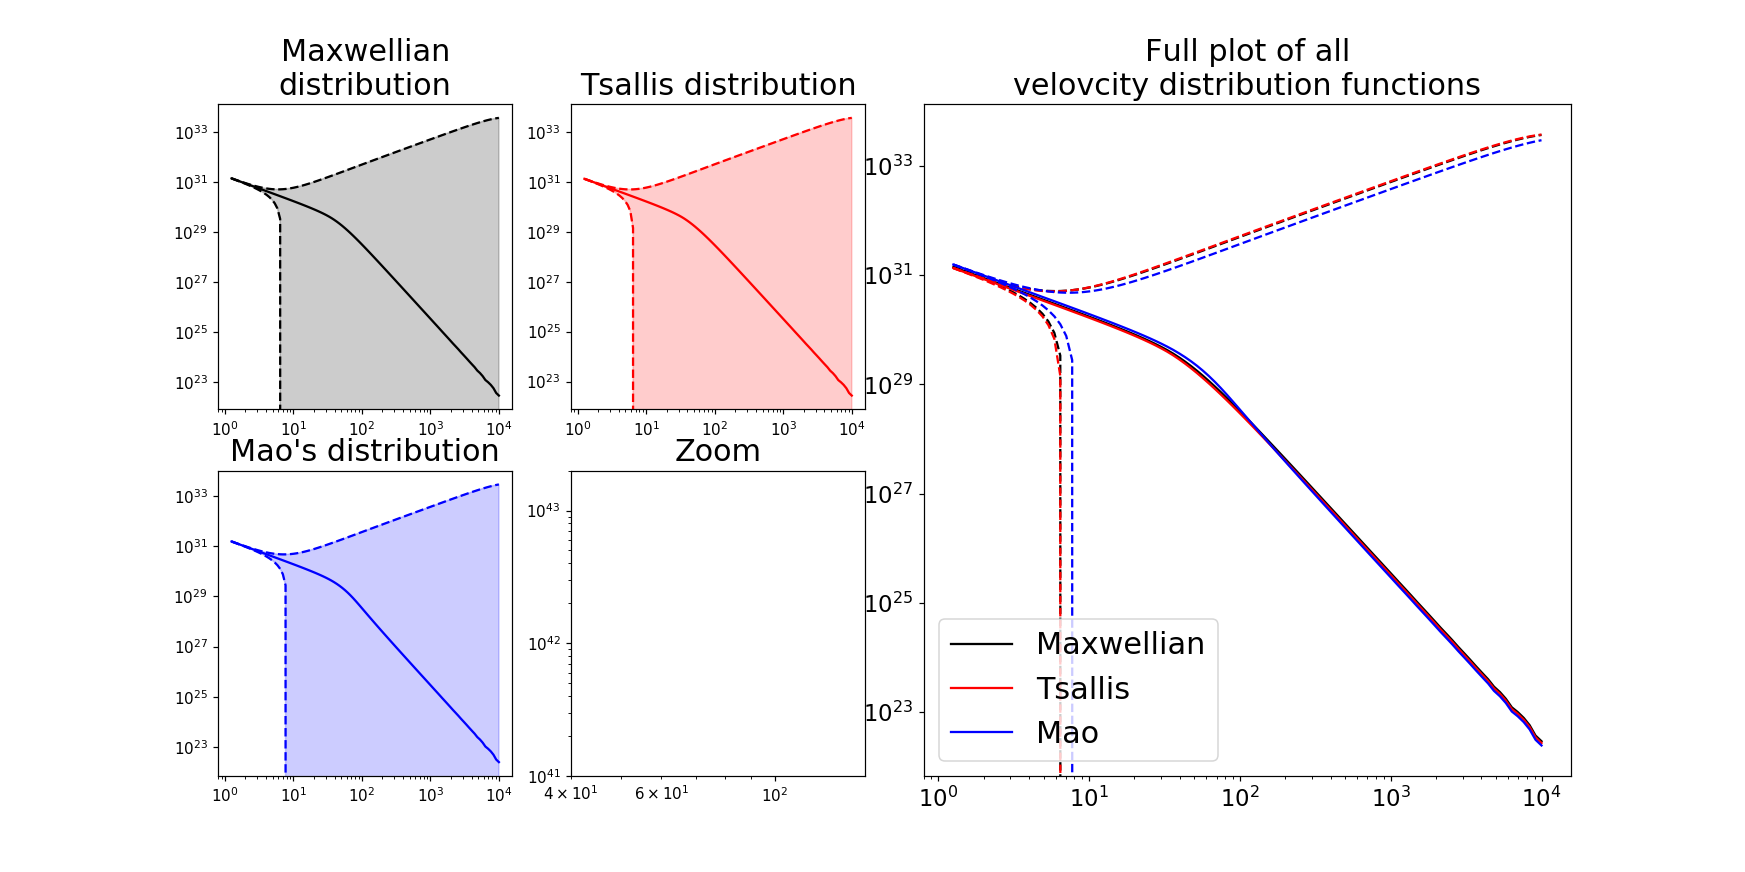

In [52]:
from matplotlib import gridspec
x_array = mass_array
#fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(16,8))
fig = plt.figure(figsize=(16,8))
gs = gridspec.GridSpec(2, 4)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[0:,2:])


ax1.set_title('Maxwellian\ndistribution',fontsize=20)
ax1.plot(x_array,arr_maxw,'k--')
ax1.plot(x_array,arr_maxw2,'k--')
ax1.plot(x_array,max1,'k-')
ax1.fill_between(x_array,arr_maxw,arr_maxw2,color='k',alpha=0.2)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2.set_title('Tsallis distribution',fontsize=20)
ax2.plot(x_array,arr_ling,'r--')
ax2.plot(x_array,arr_ling2,'r--')
ax2.plot(x_array,ling1,'r-')
ax2.fill_between(x_array,arr_ling,arr_ling2,color='r',alpha=0.2)
ax2.set_xscale('log')
ax2.set_yscale('log')


ax3.set_title("Mao's distribution",fontsize=20)
ax3.plot(x_array,arr_mao,'b--')
ax3.plot(x_array,arr_mao2,'b--')
ax3.plot(x_array,mao1,'b-')
ax3.fill_between(x_array,arr_mao,arr_mao2,color='b',alpha=0.2)
ax3.set_xscale('log')
ax3.set_yscale('log')

ax4.set_title("Zoom",fontsize=20)
ax4.plot(x_array,arr_maxw,'k--')
ax4.plot(x_array,arr_maxw2,'k--')
ax4.plot(x_array,max1,'k-')
ax4.plot(x_array,arr_ling,'r--')
ax4.plot(x_array,arr_ling2,'r--')
ax4.plot(x_array,ling1,'r-')
ax4.plot(x_array,arr_mao,'b--')
ax4.plot(x_array,arr_mao2,'b--')
ax4.plot(x_array,mao1,'b-')
ax4.set_xlim([40,150])
ax4.set_ylim([1e41,2e43])
ax4.set_xscale('log')
ax4.set_yscale('log')

ax5.set_title("Full plot of all\nvelovcity distribution functions",fontsize=20)
ax5.plot(x_array,arr_maxw,'k--')
ax5.plot(x_array,arr_maxw2,'k--')
ax5.plot(x_array,max1,'k-',label='Maxwellian')
ax5.plot(x_array,arr_ling,'r--')
ax5.plot(x_array,arr_ling2,'r--')
ax5.plot(x_array,ling1,'r-',label='Tsallis')
ax5.plot(x_array,arr_mao,'b--')
ax5.plot(x_array,arr_mao2,'b--')
ax5.plot(x_array,mao1,'b-',label='Mao')
ax5.set_xscale('log')
ax5.set_yscale('log')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
legend = ax5.legend(loc='lower left', shadow=False,prop={'size':20})
frame = legend.get_frame()

# redifining the variance
## Taylor expanding around the mean of the accesible pdf distribution

In [53]:
x = [i for i in np.arange(0.1,v_Sun+v_esc)]

def capture_cut(m):
    uss = np.linspace(0,1000,100)
    nonorm=particle_physics(uss,m)
    yesnor=np.array(ca.normalize_max(nonorm))
    return uss[np.abs(yesnor-0.09)==(np.abs(yesnor-0.09)).min()]


def norm(f):
    def inside_int(u):
        va = f(u)#vdf.gal_to_sun(u,f)
        return va
    array = map(inside_int,x)
    norm = np.trapz(array)
    return norm

def norms(f):
    def inside_int(u):
        va = vdf.gal_to_sun(u,f)
        return va
    array = map(inside_int,x)
    norm = np.trapz(array)
    return norm

def mu(f,cut):
    """
    the producto to be inside the integral
    """
    step=0.2
    x_loc = [i for i in np.arange(0.1,cut,step)]
    def inte(u):
        va = vdf.gal_to_sun(u,f)
        return va *u
    array = map(inte,x_loc)
    final = np.trapz(array)
    return final*step/norms(f)

def var(f,cut):
    """
    the producto to be inside the integral
    """
    def meanofsquare(u):
        va = vdf.gal_to_sun(u,f)
        return va * (u**2) 
    step=0.2
    x_loc = [i for i in np.arange(0.1,cut,step)]
    mx = mu(f,cut)
    mx2 = map(meanofsquare,x_loc)
    Emx2 = np.trapz(mx2)*step/norms(f)
    final = Emx2 - mx**2
    return final

cut= 900.

print mu(vdf.shm_gal,cut),np.sqrt(var(vdf.shm_gal,cut))
print mu(vdf.lin_gal,cut),np.sqrt(var(vdf.lin_gal,cut))
print mu(vdf.mao_gal,cut),np.sqrt(var(vdf.mao_gal,cut))



260.35234198829136 126.84465685379053
270.88900228114187 131.36983402423107
237.70116294653357 104.36951035671296


In [54]:
u = np.linspace(0., 700., 100.)
def variance(m,f,mu,var):
    minimum = np.where((np.abs(u-mu))==(np.abs(u-mu)).min())
    capture = np.vectorize(ca.caprate_GOU)
    y = capture(u,m)
    dy = np.zeros(y.shape,np.float)
    dy[0:-1] = np.diff(y)/np.diff(u)
    dy[-1] = (y[-1] - y[-2])/(u[-1] - u[-2])
    ddy = np.zeros(dy.shape,np.float)
    ddy[0:-1] = np.diff(dy)/np.diff(u)
    ddy[-1] = (dy[-1] - dy[-2])/(u[-1] - u[-2])
    return (((dy[minimum]**2)*var)), (((ddy[minimum]**2)*(var**2)/4.))

mass_array = np.logspace(0.1, 4, num=100)
#mass_array = np.logspace(2, 3, num=50)
#mu_mao,var_mao =  mu(vdf.mao_gal,1000),var(vdf.mao_gal,1000)
mao_sigma = mao_sigma2 = np.array([])
#mu_lin,var_lin =  mu(vdf.lin_gal,1000),var(vdf.lin_gal,1000)
lin_sigma = lin_sigma2 = np.array([])
#mu_shm,var_shm =  mu(vdf.shm_gal,1000),var(vdf.shm_gal,1000)
shm_sigma = shm_sigma2 =  np.array([])
cuts = np.array([])
for i in mass_array:    
    cut = capture_cut(i)
    cuts = np.append(cuts, cut)
    mu_mao , mu_lin, mu_shm = mu(vdf.mao_gal,cut), mu(vdf.lin_gal,cut),mu(vdf.shm_gal,cut)
    var_mao , var_lin, var_shm = var(vdf.mao_gal,cut),var(vdf.lin_gal,cut),var(vdf.shm_gal,cut)
    mao_sigma = np.append(mao_sigma, (variance(i,vdf.mao_gal,mu_mao,var_mao))[0])
    lin_sigma = np.append(lin_sigma, (variance(i,vdf.lin_gal,mu_lin,var_lin))[0])
    shm_sigma = np.append(shm_sigma, (variance(i,vdf.shm_gal,mu_shm,var_shm))[0])
    mao_sigma2 = np.append(mao_sigma2, (variance(i,vdf.mao_gal,mu_mao,var_mao)[1]))
    lin_sigma2 = np.append(lin_sigma2, (variance(i,vdf.lin_gal,mu_lin,var_lin)[1]))
    shm_sigma2 = np.append(shm_sigma2, (variance(i,vdf.shm_gal,mu_shm,var_shm)[1]))
    

<IPython.core.display.Javascript object>


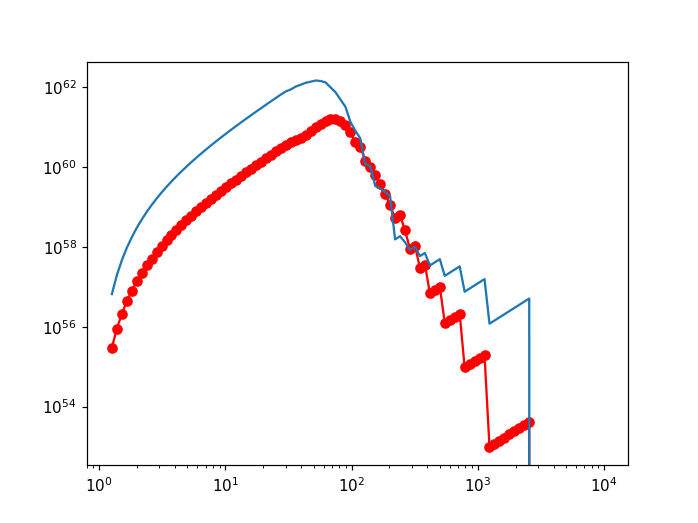

In [55]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_xscale('log')

ax.plot(mass_array,mao_sigma2,'r-o')
ax.plot(mass_array,mao_sigma)

In [56]:
muss = np.vectorize(mu)
mao_muss = muss(vdf.mao_gal,cuts)
lin_muss = muss(vdf.lin_gal,cuts)
shm_muss = muss(vdf.shm_gal,cuts)


<IPython.core.display.Javascript object>


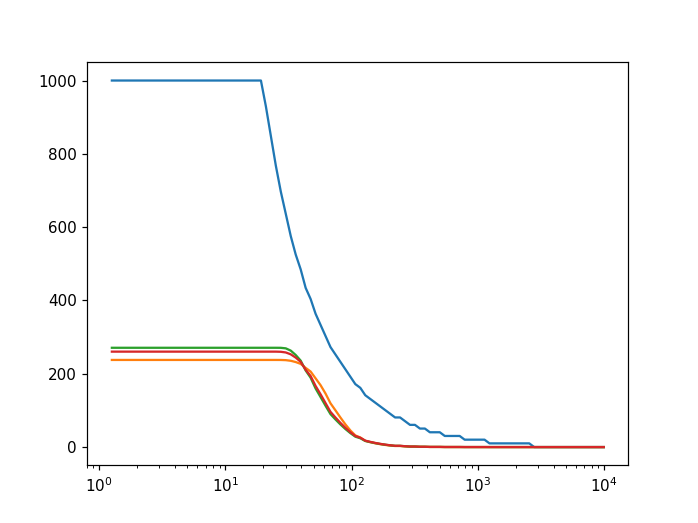

In [57]:
fig, ax = plt.subplots()
ax.set_xscale('log')
#ax.plot(x,y)
#ax.plot(mass_array,lin_sigma)
ax.plot(mass_array,cuts)
ax.plot(mass_array,mao_muss)
ax.plot(mass_array,lin_muss)
ax.plot(mass_array,shm_muss)


#ax.plot(mass_array,lin_sigma2)

#ax.plot(x[x<500],y[x<500]/np.abs(y[x<500]).max())

In [58]:

x = [i for i in np.arange(0.1,v_esc)]
def product(m,f):
    """
    the producto to be inside the integral
    """
    def inside_int(u):
        va = vdf.gal_to_sun(u,f)
        va2 = ca.caprate_GOU(u, m)#, rms=str(f)[10])
        if va2 < 0:
                va2 = 0.0
        return va * va2
    array = map(inside_int,x)
    final = np.trapz(array)
    return final

def product_square(m,f):
    """
    the producto to be inside the integral
    """
    def inside_int(u):
        va = vdf.gal_to_sun(u,f)
        va2 = ca.caprate_GOU(u, m)#, rms=str(f)[10])
        if va2 < 0:
                va2 = 0.0
        return  va *((va2)**2)/ u
    array = map(inside_int,x)
    final = np.trapz(array)
    return final 

def cap(m,f):
    """
    the producto to be inside the integral
    """
    def inside_int(u):
        va = vdf.gal_to_sun(u,f)
        va2 = ca.caprate_GOU(u, m)#, rms=str(f)[10])
        if va2 < 0:
                va2 = 1e-15
        return va2
    #array = map(inside_int,x)
    #final = np.trapz(array)
    final = quad(inside_int, 0,1000)[0]
    return final

## find this fuction above
E_g = np.vectorize(product)
E_g2 = np.vectorize(product_square)
#check = np.vectorize(cap)
## fist test with maxwellian(shm) ##
fdu = vdf.shm_gal
#mass_array = np.logspace(0.1, 4, num=50)
max1 = E_g(mass_array,fdu)/norms(fdu)
fdu = vdf.lin_gal
ling1 = E_g(mass_array,fdu)/norms(fdu)
fdu = vdf.mao_gal
mao1 = E_g(mass_array,fdu)/norms(fdu)

In [59]:
arr_maxw = max1 + np.sqrt(shm_sigma)
arr_maxw2 = max1 - np.sqrt(shm_sigma)
arr_ling = ling1 + np.sqrt(lin_sigma)
arr_ling2 = ling1 - np.sqrt(lin_sigma)
arr_mao = mao1 + np.sqrt(mao_sigma)
arr_mao2 = mao1 - np.sqrt(mao_sigma)

<IPython.core.display.Javascript object>


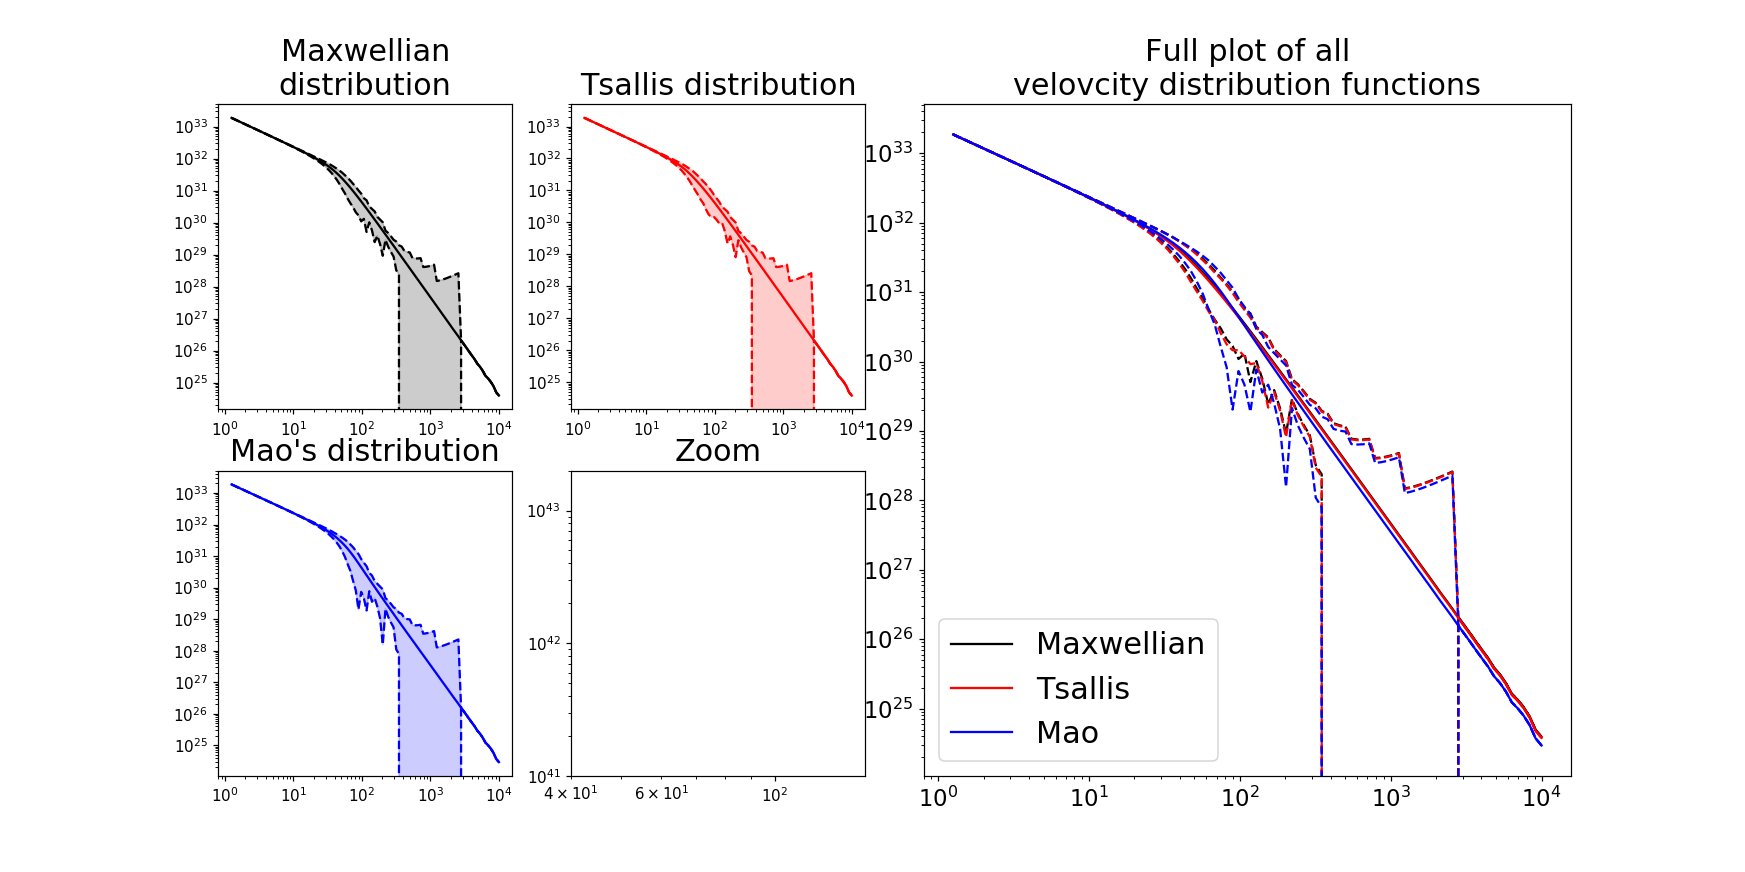

In [60]:
from matplotlib import gridspec
x_array = mass_array
#fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(16,8))
fig = plt.figure(figsize=(16,8))
gs = gridspec.GridSpec(2, 4)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[0:,2:])


ax1.set_title('Maxwellian\ndistribution',fontsize=20)
ax1.plot(x_array,arr_maxw,'k--')
ax1.plot(x_array,arr_maxw2,'k--')
ax1.plot(x_array,max1,'k-')
ax1.fill_between(x_array,arr_maxw,arr_maxw2,color='k',alpha=0.2)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2.set_title('Tsallis distribution',fontsize=20)
ax2.plot(x_array,arr_ling,'r--')
ax2.plot(x_array,arr_ling2,'r--')
ax2.plot(x_array,ling1,'r-')
ax2.fill_between(x_array,arr_ling,arr_ling2,color='r',alpha=0.2)
ax2.set_xscale('log')
ax2.set_yscale('log')


ax3.set_title("Mao's distribution",fontsize=20)
ax3.plot(x_array,arr_mao,'b--')
ax3.plot(x_array,arr_mao2,'b--')
ax3.plot(x_array,mao1,'b-')
ax3.fill_between(x_array,arr_mao,arr_mao2,color='b',alpha=0.2)
ax3.set_xscale('log')
ax3.set_yscale('log')

ax4.set_title("Zoom",fontsize=20)
ax4.plot(x_array,arr_maxw,'k--')
ax4.plot(x_array,arr_maxw2,'k--')
ax4.plot(x_array,max1,'k-')
ax4.plot(x_array,arr_ling,'r--')
ax4.plot(x_array,arr_ling2,'r--')
ax4.plot(x_array,ling1,'r-')
ax4.plot(x_array,arr_mao,'b--')
ax4.plot(x_array,arr_mao2,'b--')
ax4.plot(x_array,mao1,'b-')
ax4.set_xlim([40,150])
ax4.set_ylim([1e41,2e43])
ax4.set_xscale('log')
ax4.set_yscale('log')

ax5.set_title("Full plot of all\nvelovcity distribution functions",fontsize=20)
ax5.plot(x_array,arr_maxw,'k--')
ax5.plot(x_array,arr_maxw2,'k--')
ax5.plot(x_array,max1,'k-',label='Maxwellian')
ax5.plot(x_array,arr_ling,'r--')
ax5.plot(x_array,arr_ling2,'r--')
ax5.plot(x_array,ling1,'r-',label='Tsallis')
ax5.plot(x_array,arr_mao,'b--')
ax5.plot(x_array,arr_mao2,'b--')
ax5.plot(x_array,mao1,'b-',label='Mao')
ax5.set_xscale('log')
ax5.set_yscale('log')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
legend = ax5.legend(loc='lower left', shadow=False,prop={'size':20})
frame = legend.get_frame()

In [61]:
sigma_mao = np.sqrt(mao_sigma)
sigma_ling = np.sqrt(lin_sigma)
sigma_maxw = np.sqrt(shm_sigma)
sigma_R_mao = (sigma_mao / max1)+(mao1 * sigma_maxw / (max1**2))
sigma_R_Ling = (sigma_ling / max1)+(ling1 * sigma_maxw / (max1**2))

<IPython.core.display.Javascript object>


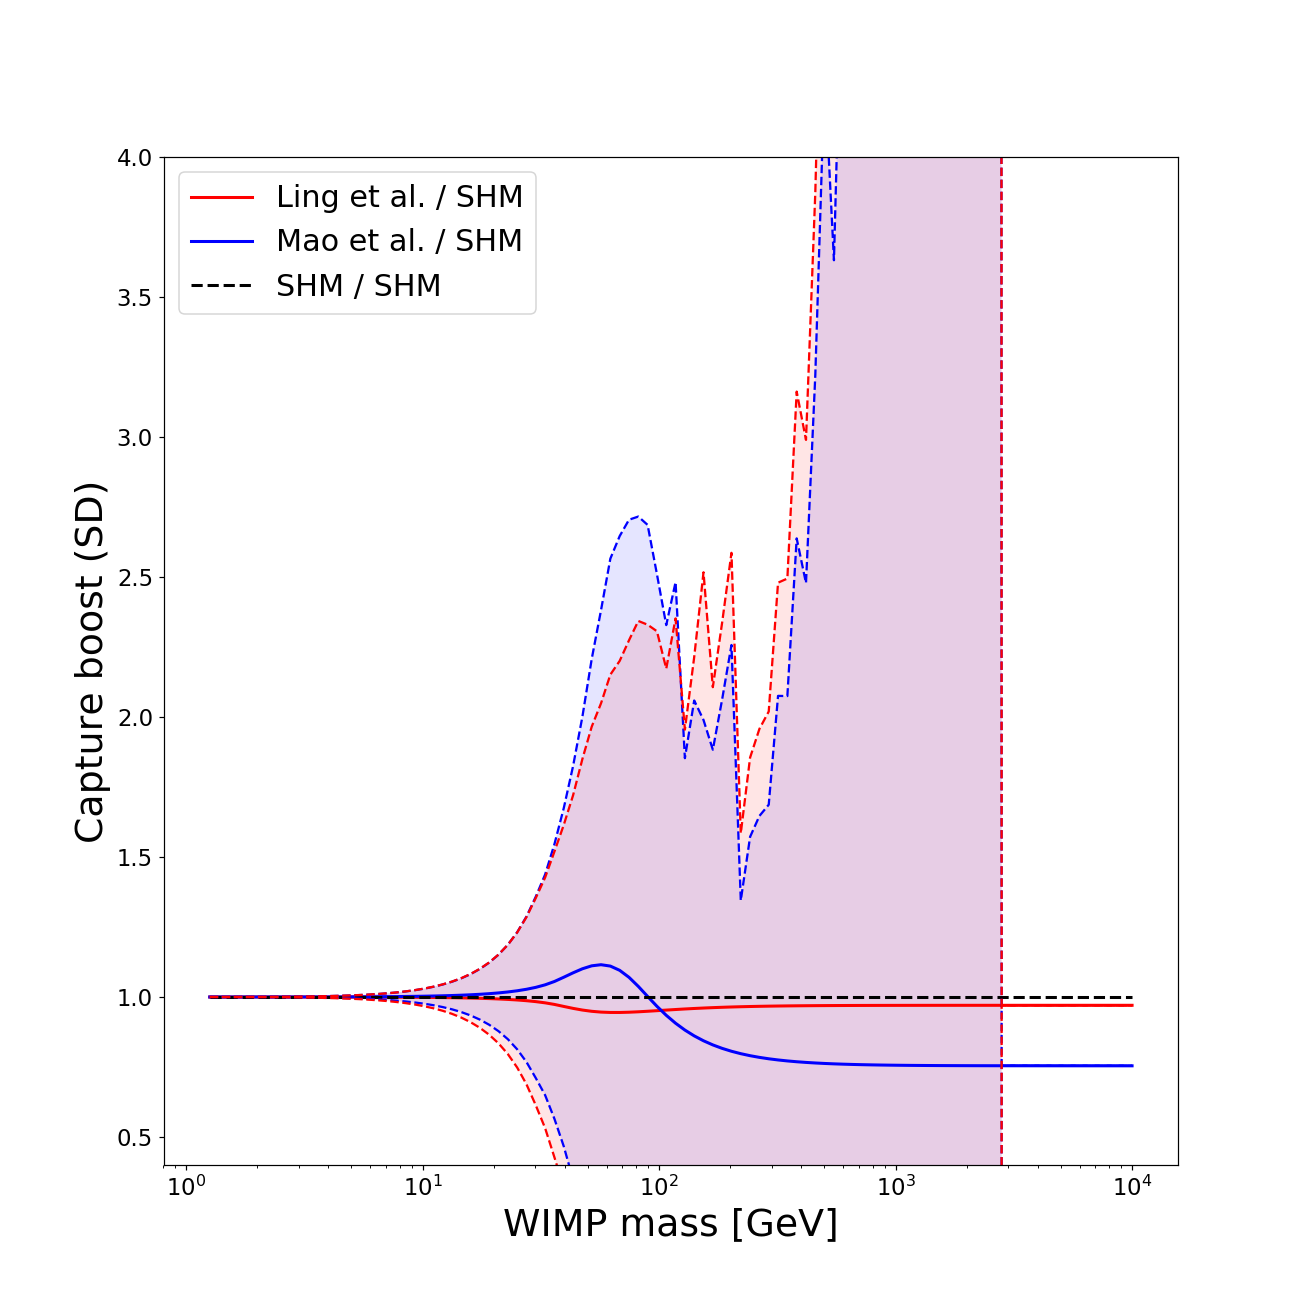

In [62]:
array = ling1/max1
array2 = mao1/max1

maoR_plus_sigma = array2 + sigma_R_mao
maoR_minus_sigma = array2 - sigma_R_mao
lingR_plus_sigma = array + sigma_R_Ling
lingR_minus_sigma = array - sigma_R_Ling
 

fig, ax1 = plt.subplots(figsize=(12,12))
ax1.set_xlabel('WIMP mass [GeV]',fontsize=25)
ax1.set_ylabel('Capture boost (SD)',fontsize=25)
ax1.set_xscale('log')
#ax1.set_yscale('log')

ax1.set_ylim([0.4,4])
#ax.set_xlim([1,20000])
line1 = ax1.plot(x_array, array,'r-', linewidth=2.0,
                    label='Ling et al. / SHM')
line2 = ax1.plot(x_array, array2,'b-', linewidth=2.0,
                    label="Mao et al. / SHM")
shm = [1 for i in x_array]
SHM = ax1.plot(x_array, shm,'k--', linewidth=2.0,
                    label="SHM / SHM")

legend = ax1.legend(loc='upper left', shadow=False,prop={'size':20})
ax1.plot(x_array,maoR_plus_sigma,'b--')

ax1.plot(x_array,maoR_minus_sigma,'b--')
ax1.plot(x_array, lingR_plus_sigma, 'r--')
ax1.plot(x_array, lingR_minus_sigma, 'r--')
ax1.fill_between(x_array, array2,maoR_plus_sigma,facecolor='b',alpha=0.1)
ax1.fill_between(x_array, array2,maoR_minus_sigma,facecolor='b',alpha=0.1)
ax1.fill_between(x_array, array,lingR_plus_sigma,facecolor='r',alpha=0.1)
ax1.fill_between(x_array, array,lingR_minus_sigma,facecolor='r',alpha=0.1)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
# The frame is matplotlib.patches.Rectangle instance surrounding the leg    end.
frame = legend.get_frame()